<div style="border:2px solid #e74c3c; background:#fdecea; color:#c0392b; padding:16px; border-radius:6px; font-size:1.2em; font-weight:bold; margin-bottom:18px;">
⚠️ <span style="color:#c0392b;">COMPATIBILITY 0.0.7</span>
</div>

# Tutorial 2: Advanced NIRS Analysis

Welcome to the advanced NIRS4All tutorial! This guide covers sophisticated techniques for professional NIRS data analysis, including multi-source analysis, hyperparameter optimization, and advanced visualizations.

## What You'll Master
1. **Multi-Source Analysis** - Handle multiple datasets simultaneously
2. **Hyperparameter Optimization** - Automated model tuning with Optuna
3. **Configuration Generation** - Advanced pipeline customization
4. **Advanced Visualizations** - Professional-grade charts and analysis
5. **Neural Networks** - Deep learning for NIRS data
6. **Everything Together** - Complex real-world workflows

## Prerequisites
- Completion of Tutorial 1 (Beginner's Guide)
- Understanding of cross-validation and model evaluation
- Basic knowledge of hyperparameter tuning concepts

Let's dive into advanced NIRS analysis! 🚀

## Part 1: Multi-Source Data Analysis

Multi-source analysis refers to datasets with multiple target variables (multi-target regression). This is different from multiple datasets - here we have one dataset but predict multiple properties simultaneously.

### Step 1.1: Import Advanced Libraries

In [1]:
# Standard library imports
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

# Third-party imports
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import ShuffleSplit, RepeatedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

# NIRS4All imports
from nirs4all.data import DatasetConfigs
from nirs4all.data.predictions import Predictions
from nirs4all.data.prediction_analyzer import PredictionAnalyzer
from nirs4all.operators.models.cirad_tf import nicon, customizable_nicon
from nirs4all.operators.transforms import (
    Gaussian, SavitzkyGolay, StandardNormalVariate, Haar,
    MultiplicativeScatterCorrection, Detrend, FirstDerivative
)
from nirs4all.pipeline import PipelineConfigs, PipelineRunner

# Enable visual feedback
os.environ['DISABLE_EMOJIS'] = '0'

print("✅ Advanced libraries imported successfully!")
print("🧠 Neural network models available")
print("🔬 Multiple spectral preprocessing techniques loaded")

✅ Advanced libraries imported successfully!
🧠 Neural network models available
🔬 Multiple spectral preprocessing techniques loaded


### Step 1.2: Configure Multi-Source Pipeline

Let's build a sophisticated pipeline that works across multiple datasets:

In [2]:
# Advanced multi-source pipeline
multi_source_pipeline = [
    # Advanced scaling with custom range
    MinMaxScaler(feature_range=(0.1, 0.8)),

    # Comprehensive feature augmentation
    {"feature_augmentation": [
        MultiplicativeScatterCorrection(),
        Gaussian(),
        StandardNormalVariate(),
        SavitzkyGolay(),
        Haar(),
        [MultiplicativeScatterCorrection(), Gaussian()],
        [MultiplicativeScatterCorrection(), StandardNormalVariate()],
        [StandardNormalVariate(), SavitzkyGolay()],
        [Detrend(), FirstDerivative()],
    ]},

    # Robust cross-validation
    ShuffleSplit(n_splits=5, test_size=0.2, random_state=42),
    {"y_processing": MinMaxScaler()},

    # Diverse model ensemble
    {"model": PLSRegression(15), "name": "PLS-15"},
    {"model": PLSRegression(25), "name": "PLS-25"},
    {"model": ElasticNet(alpha=0.1), "name": "ElasticNet"},
    {"model": RandomForestRegressor(n_estimators=10, max_depth=5), "name": "RandomForest"},

    # Neural network with custom training parameters
    {
        "model": nicon,
        "name": "DeepNIRS",
        "train_params": {
            "epochs": 20,
            "patience": 20,
            "batch_size": 64,
            "verbose": 0
        }
    }
]

print("🔧 Multi-source pipeline configured with:")
print("   • 9 preprocessing strategies (including combinations)")
print("   • 5 different model types")
print("   • 5-fold cross-validation")
print("   • Neural network with custom training")
print(f"   • Total configurations: {5 * 9} = 45")

🔧 Multi-source pipeline configured with:
   • 9 preprocessing strategies (including combinations)
   • 5 different model types
   • 5-fold cross-validation
   • Neural network with custom training
   • Total configurations: 45 = 45


### Step 1.3: Run Multi-Source Analysis

In [3]:
# Configure multi-source dataset (multiple targets)
multi_source_data = 'sample_data/multi'  # Single dataset with multiple target variables
multi_config = PipelineConfigs(multi_source_pipeline, "Advanced_MultiSource")
dataset_config = DatasetConfigs(multi_source_data)

print(f"🏃‍♂️ Running multi-source analysis (multi-target regression)...")
print("⚠️  This may take several minutes due to neural network training")

runner = PipelineRunner(save_files=False, verbose=1)
multi_predictions, predictions_per_dataset = runner.run(multi_config, dataset_config)

print(f"✅ Multi-source analysis completed!")
print(f"📊 Total predictions: {len(multi_predictions)}")
print(f"📁 Multi-source results: {len(predictions_per_dataset)}")

📊 Multiple train_x files found for sample_data/multi: 3 sources detected.
📊 Multiple test_x files found for sample_data/multi: 3 sources detected.
🏃‍♂️ Running multi-source analysis (multi-target regression)...
⚠️  This may take several minutes due to neural network training
🚀 Starting Nirs4all run(s) with 1 pipeline on 1 dataset (1 total runs).
📊 Dataset: multi (regression)
Features (samples=189, sources=3):
- Source 0: (189, 1, 2151), processings=['raw'], min=-0.265, max=1.436, mean=0.466, var=0.149)
- Source 1: (189, 1, 2151), processings=['raw'], min=-0.265, max=1.436, mean=0.466, var=0.149)
- Source 2: (189, 1, 2151), processings=['raw'], min=-0.265, max=1.436, mean=0.466, var=0.149)
Targets: (samples=189, targets=1, processings=['numeric'])
- numeric: min=1.33, max=128.31, mean=30.779
Indexes:
- "train", ['raw']: 130 samples
- "test", ['raw']: 59 samples
🚀 Starting pipeline Advanced_MultiSource_a8dfa5 on dataset multi
--------------------------------------------------------------

### Step 1.4: Analyze Multi-Source Results

Let's examine how models perform across different datasets:

In [4]:
# Analyze multi-target results
print("📊 Multi-Source Analysis Results:")
print("=" * 60)

# Check if we have multi-target results
if predictions_per_dataset:
    for source_name, source_result in predictions_per_dataset.items():
        source_predictions = source_result['run_predictions']
        top_3 = source_predictions.top_k(3, 'rmse')

        print(f"\n🎯 Multi-Source Data: {source_name}")
        print(f"   Total predictions: {len(source_predictions)}")
        print("   Top 3 models for multi-target regression:")

        for idx, model in enumerate(top_3):
            preprocessing = model['preprocessings'] if model['preprocessings'] else 'None'
            print(f"     {idx+1}. {model['model_name']} | RMSE: {model['rmse']:.4f}")
            print(f"        Preprocessing: {preprocessing}")
            # Check if this model handles multiple targets
            if hasattr(model.get('y_pred', []), 'shape') and len(model['y_pred'].shape) > 1:
                print(f"        Target dimensions: {model['y_pred'].shape}")

# Overall multi-target analysis
print("\n🏆 Best Multi-Target Models:")
overall_top = multi_predictions.top_k(5, 'rmse')
for idx, model in enumerate(overall_top):
    print(f"{idx+1}. {model['model_name']} | RMSE: {model['rmse']:.4f}")
    if 'dataset_name' in model:
        print(f"    Source: {model['dataset_name']}")

📊 Multi-Source Analysis Results:

🎯 Multi-Source Data: multi
   Total predictions: 105
   Top 3 models for multi-target regression:
     1. PLS-15 | RMSE: 6.9137
        Preprocessing: MinMax|MinMax>MSC|MinMax>Gauss|MinMax>Std|MinMax>SG|MinMax>Haar|MinMax>MSC>Gauss|MinMax>MSC>Std|MinMax>Std>SG|MinMax>Detr>1stDer
        Target dimensions: (130, 1)
     2. PLS-25 | RMSE: 6.9154
        Preprocessing: MinMax|MinMax>MSC|MinMax>Gauss|MinMax>Std|MinMax>SG|MinMax>Haar|MinMax>MSC>Gauss|MinMax>MSC>Std|MinMax>Std>SG|MinMax>Detr>1stDer
        Target dimensions: (130, 1)
     3. PLS-15 | RMSE: 7.0688
        Preprocessing: MinMax|MinMax>MSC|MinMax>Gauss|MinMax>Std|MinMax>SG|MinMax>Haar|MinMax>MSC>Gauss|MinMax>MSC>Std|MinMax>Std>SG|MinMax>Detr>1stDer
        Target dimensions: (130, 1)

🏆 Best Multi-Target Models:
1. PLS-15 | RMSE: 6.9137
    Source: multi
2. PLS-25 | RMSE: 6.9154
    Source: multi
3. PLS-15 | RMSE: 7.0688
    Source: multi
4. PLS-25 | RMSE: 7.0690
    Source: multi
5. RandomFore

### Step 1.5: Multi-Source Visualizations

📊 Creating visualization 1/3: Models vs Preprocessing
📊 Creating visualization 2/3: Top Models Comparison
📊 Creating visualization 3/3: Performance Distribution


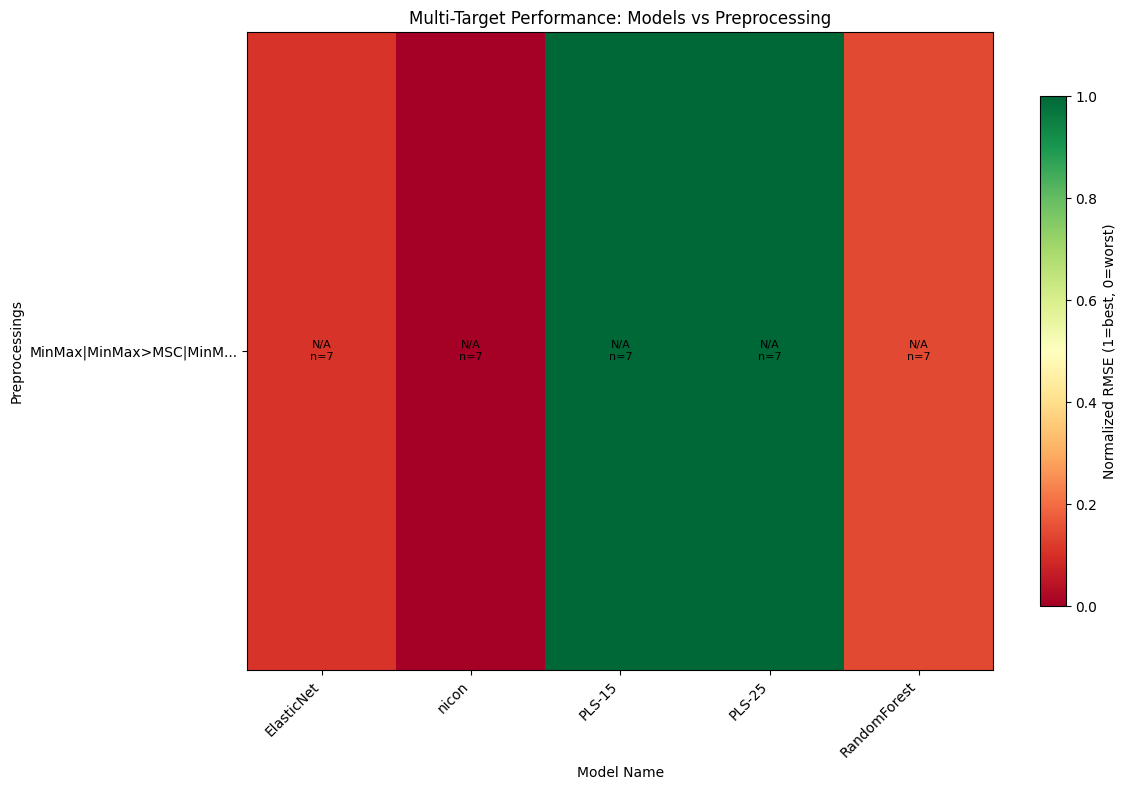

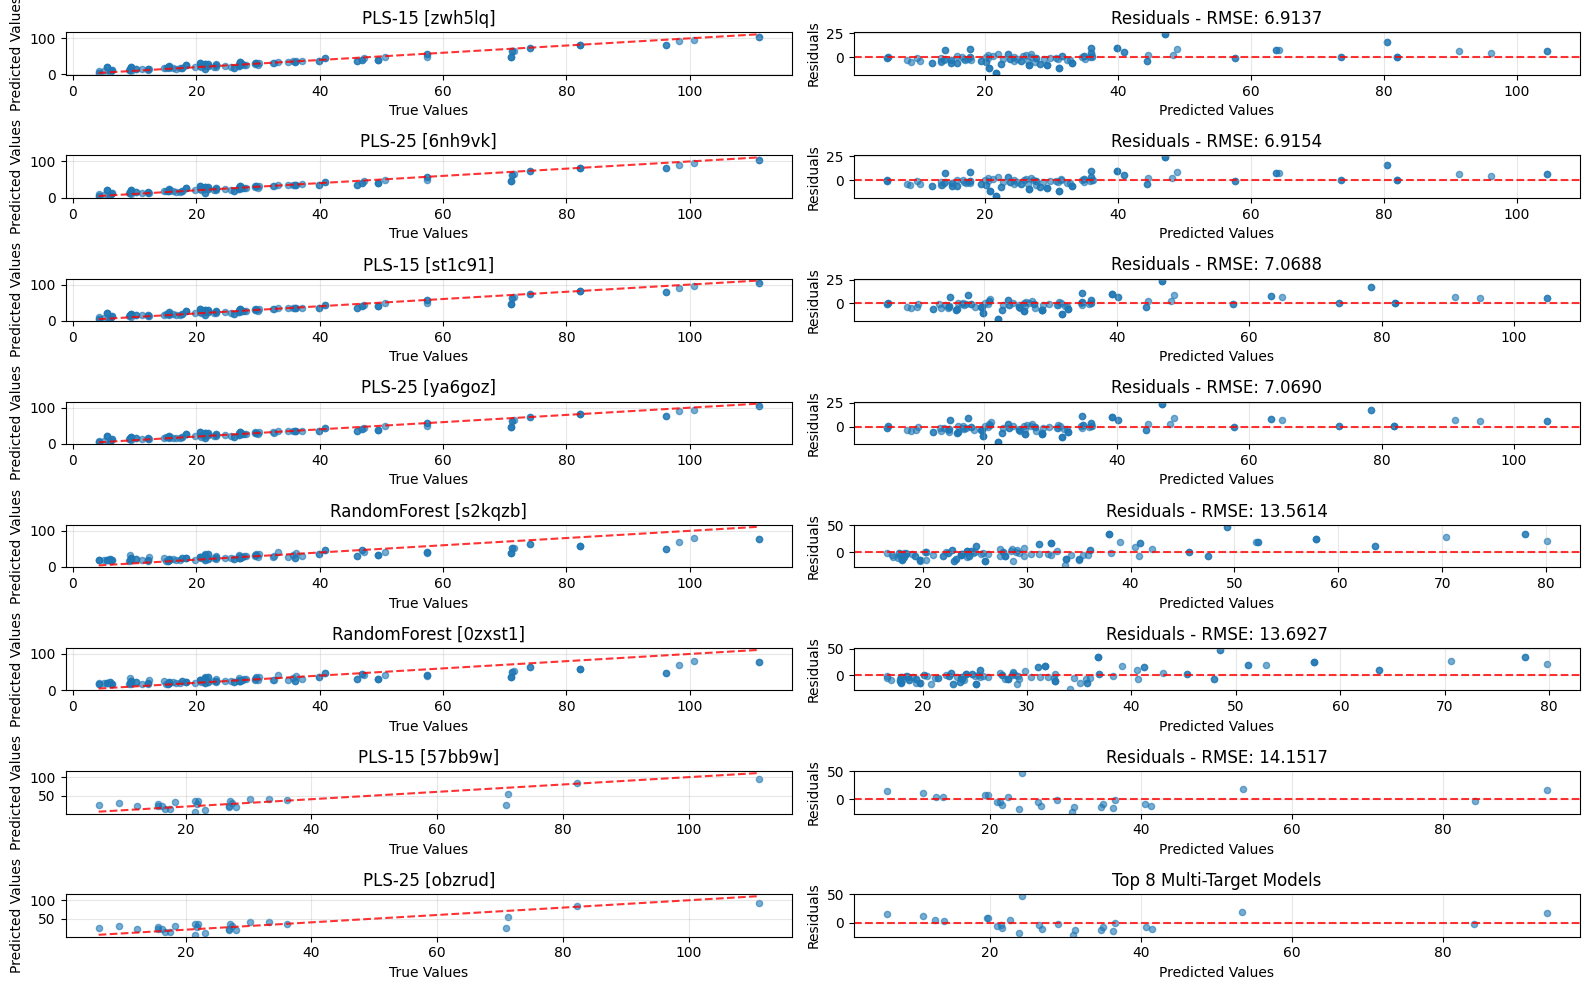

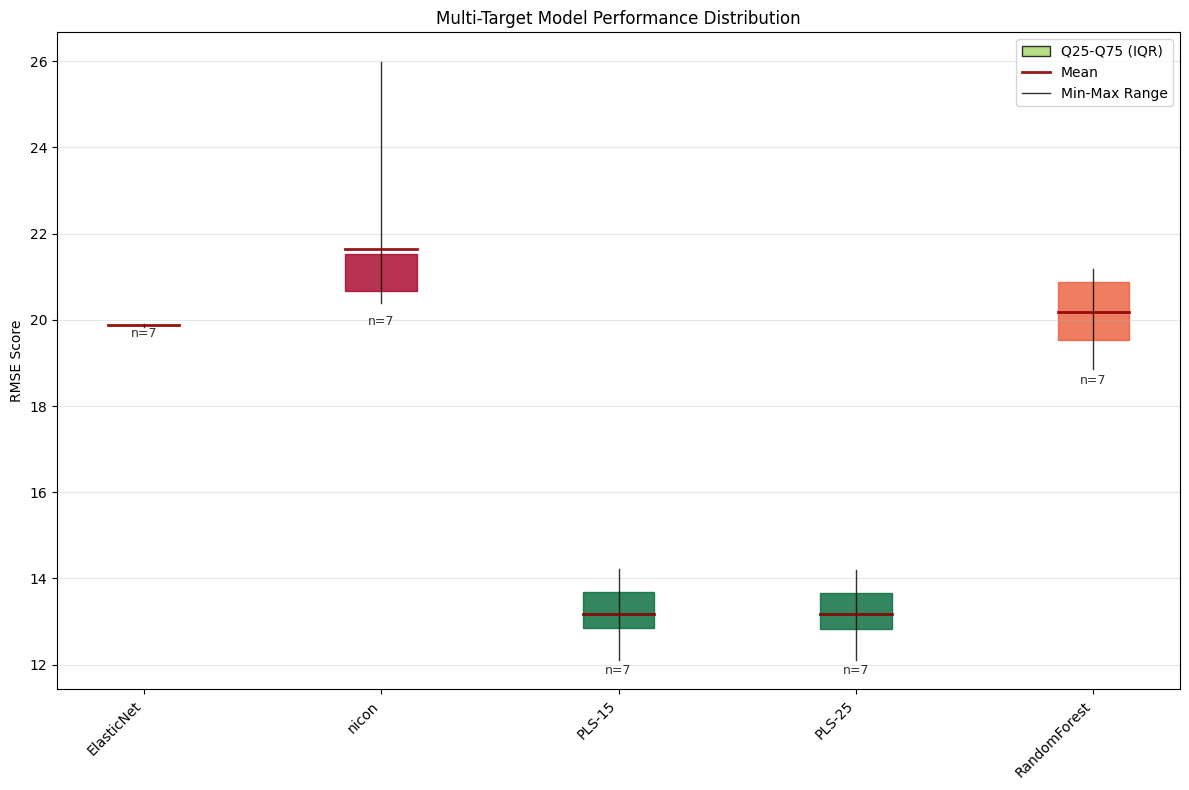

🎨 Multi-source visualizations completed!


In [5]:
# Create multi-source visualizations
multi_analyzer = PredictionAnalyzer(multi_predictions)

# 1. Performance across preprocessing methods
print("📊 Creating visualization 1/3: Models vs Preprocessing")
fig1 = multi_analyzer.plot_variable_heatmap(
    x_var="model_name",
    y_var="preprocessings",
    rank_metric='rmse'
)
plt.title("Multi-Target Performance: Models vs Preprocessing")

# 2. Top models comparison
print("📊 Creating visualization 2/3: Top Models Comparison")
fig2 = multi_analyzer.plot_top_k_comparison(k=8, rank_metric='rmse')
plt.title("Top 8 Multi-Target Models")

# 3. Performance distribution
print("📊 Creating visualization 3/3: Performance Distribution")
fig3 = multi_analyzer.plot_variable_candlestick(
    filters={"partition": "test"},
    variable="model_name"
)
plt.title("Multi-Target Model Performance Distribution")

plt.show(block=False)
print("🎨 Multi-source visualizations completed!")

## Part 2: Hyperparameter Optimization with Optuna

NIRS4All integrates with Optuna for sophisticated hyperparameter optimization. Let's optimize PLS and neural network models:

### Step 2.1: Configure Hyperparameter Optimization

In [6]:
# Hyperparameter optimization pipeline
optimization_pipeline = [
    "chart_2d",
    MinMaxScaler(),
    {"y_processing": MinMaxScaler()},

    # Feature augmentation for optimization
    {"feature_augmentation": {
        "_or_": [
            StandardNormalVariate(),
            SavitzkyGolay(),
            MultiplicativeScatterCorrection(),
            Gaussian()
        ],
        "size": [1, 2],
        "count": 4
    }},

    ShuffleSplit(n_splits=3, test_size=0.25),

    # PLS with hyperparameter optimization
    {
        "model": PLSRegression(),
        "name": "OptimizedPLS",
        "finetune_params": {
            "n_trials": 30,
            "verbose": 2,
            "approach": "single",
            "eval_mode": "best",
            "sample": "tpe",  # Tree-structured Parzen Estimator
            "model_params": {
                'n_components': ('int', 5, 30),
            }
        }
    },

    # Neural network with hyperparameter optimization
    {
        "model": customizable_nicon,
        "name": "OptimizedNeuralNet",
        "finetune_params": {
            "n_trials": 20,
            "verbose": 2,
            "sample": "hyperband",
            "approach": "single",
            "model_params": {
                "filters_1": [16, 32, 64, 128],
                "filters_2": [16, 32, 64, 128],
                "filters_3": [16, 32, 64, 128]
            },
            "train_params": {
                "epochs": 20,
                "verbose": 0
            }
        },
        "train_params": {
            "epochs": 100,
            "patience": 15,
            "verbose": 0
        }
    }
]

# Add baseline models for comparison
for n_comp in [10, 15, 20]:
    optimization_pipeline.append({
        "model": PLSRegression(n_components=n_comp),
        "name": f"Baseline-PLS-{n_comp}"
    })

print("🎯 Hyperparameter optimization pipeline configured:")
print("   • PLS optimization: 30 trials (n_components: 5-30)")
print("   • Neural net optimization: 20 trials (filter sizes)")
print("   • 3 baseline PLS models for comparison")
print("   • 4 preprocessing combinations")

🎯 Hyperparameter optimization pipeline configured:
   • PLS optimization: 30 trials (n_components: 5-30)
   • Neural net optimization: 20 trials (filter sizes)
   • 3 baseline PLS models for comparison
   • 4 preprocessing combinations


### Step 2.2: Run Hyperparameter Optimization

In [7]:
# Run optimization
opt_config = PipelineConfigs(optimization_pipeline, "Advanced_Optimization")
dataset_config = DatasetConfigs('sample_data/regression')

print("🎯 Starting hyperparameter optimization...")
print("⚠️  This will take several minutes - Optuna is testing many configurations")
print("📊 Watch the verbose output to see optimization progress")

runner = PipelineRunner(save_files=True, verbose=1)  # Save optimized models
opt_predictions, _ = runner.run(opt_config, dataset_config)

print(f"✅ Hyperparameter optimization completed!")
print(f"🔍 Total configurations tested: {len(opt_predictions)}")

🎯 Starting hyperparameter optimization...
⚠️  This will take several minutes - Optuna is testing many configurations
📊 Watch the verbose output to see optimization progress
🚀 Starting Nirs4all run(s) with 4 pipeline on 1 dataset (4 total runs).
📊 Dataset: regression (regression)
Features (samples=189, sources=1):
- Source 0: (189, 1, 2151), processings=['raw'], min=-0.265, max=1.436, mean=0.466, var=0.149)
Targets: (samples=189, targets=1, processings=['numeric'])
- numeric: min=1.33, max=128.31, mean=30.779
Indexes:
- "train", ['raw']: 130 samples
- "test", ['raw']: 59 samples
🚀 Starting pipeline Advanced_Optimization_14ada2 on dataset regression
------------------------------------------------------------------------------------------------------------------------
🔷 Step 1: chart_2d
🔹 Executing controller SpectraChartController without operator


[I 2025-10-05 23:35:31,531] A new study created in memory with name: no-name-da5cf2f4-df13-4568-bd82-d2d42253ba55


------------------------------------------------------------------------------------------------------------------------
🔷 Step 2: {'class': 'sklearn.preprocessing._data.MinMaxScaler', '_runtime_instance': MinMaxScaler()}
🔹 Executing controller TransformerMixinController with operator MinMaxScaler
------------------------------------------------------------------------------------------------------------------------
Update: 📊 Dataset: regression (regression)
Features (samples=189, sources=1):
- Source 0: (189, 1, 2151), processings=['raw_MinMaxScaler_1'], min=0.0, max=1.128, mean=0.801, var=0.033)
Targets: (samples=189, targets=1, processings=['numeric'])
- numeric: min=1.33, max=128.31, mean=30.779
Indexes:
- "train", ['raw_MinMaxScaler_1']: 130 samples
- "test", ['raw_MinMaxScaler_1']: 59 samples
------------------------------------------------------------------------------------------------------------------------
🔷 Step 3: {'y_processing': {'class': 'sklearn.preprocessing._data.Min

[I 2025-10-05 23:35:31,620] Trial 0 finished with value: 0.015290234492873438 and parameters: {'n_components': 19}. Best is trial 0 with value: 0.015290234492873438.
[I 2025-10-05 23:35:31,702] Trial 1 finished with value: 0.014907084132778052 and parameters: {'n_components': 16}. Best is trial 1 with value: 0.014907084132778052.
[I 2025-10-05 23:35:31,812] Trial 2 finished with value: 0.0174959029922854 and parameters: {'n_components': 21}. Best is trial 1 with value: 0.014907084132778052.
[I 2025-10-05 23:35:31,910] Trial 3 finished with value: 0.01780352050165854 and parameters: {'n_components': 22}. Best is trial 1 with value: 0.014907084132778052.
[I 2025-10-05 23:35:31,950] Trial 4 finished with value: 0.026781429763032175 and parameters: {'n_components': 6}. Best is trial 1 with value: 0.014907084132778052.
[I 2025-10-05 23:35:32,031] Trial 5 finished with value: 0.014907084132778052 and parameters: {'n_components': 16}. Best is trial 1 with value: 0.014907084132778052.
[I 2025-

🏆 Best score: 0.0137
📊 Best parameters: {'n_components': 18}
📊 Best parameters: {'n_components': 18}
Training model OptimizedPLS with: {'n_components': 18}...
Training model OptimizedPLS with: {'n_components': 18}...
Training model OptimizedPLS with: {'n_components': 18}...
✅ OptimizedPLS rmse ↓ [test: 12.0190], [val: 12.9407], (fold: 0, id: 1) - [nvayt3]
✅ OptimizedPLS rmse ↓ [test: 12.4257], [val: 16.8562], (fold: 1, id: 2) - [ih1bty]
✅ OptimizedPLS rmse ↓ [test: 11.4159], [val: 15.4154], (fold: 2, id: 3) - [bx29us]
✅ OptimizedPLS rmse ↓ [test: 11.3791], [val: 11.7220], (avg, id: 4) - [rwxd1l]
✅ OptimizedPLS rmse ↓ [test: 11.3651], [val: 11.6610], (w_avg, id: 5) - [ze91bw]
------------------------------------------------------------------------------------------------------------------------
🔷 Step 7: {'model': {'function': 'nirs4all.operators.models.cirad_tf.customizable_nicon'}, 'name': 'OptimizedNeuralNet', 'finetune_params': {'n_trials': 20, 'verbose': 2, 'sample': 'hyperband', '

[I 2025-10-05 23:35:40,480] Trial 0 finished with value: 0.028496522456407547 and parameters: {'filters_1': 64, 'filters_2': 128, 'filters_3': 32}. Best is trial 0 with value: 0.028496522456407547.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0722 - mae: 0.2346 - mse: 0.0722 - val_loss: 0.0477 - val_mae: 0.1919 - val_mse: 0.0477
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0477 - mae: 0.1774 - mse: 0.0477 - val_loss: 0.0438 - val_mae: 0.1818 - val_mse: 0.0438
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0395 - mae: 0.1580 - mse: 0.0395 - val_loss: 0.0508 - val_mae: 0.2006 - val_mse: 0.0508
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0405 - mae: 0.1506 - mse: 0.0405 - val_loss: 0.0521 - val_mae: 0.2039 - val_mse: 0.0521
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0406 - mae: 0.1559 - mse: 0.0406 - val_loss: 0.0510 - val_mae: 0.2004 - val_mse: 0.0510
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0421 - mae: 0.1575 - mse: 0.0421 - val_loss: 0.0437 - val_mae: 0.1806 - val_mse: 0.0437
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0352 - mae: 0.1394 - mse: 0.0352 - val_loss: 0.0396 

[I 2025-10-05 23:35:51,065] Trial 1 finished with value: 0.02061680518090725 and parameters: {'filters_1': 32, 'filters_2': 128, 'filters_3': 32}. Best is trial 1 with value: 0.02061680518090725.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.2229 - mae: 0.4410 - mse: 0.2229 - val_loss: 0.2109 - val_mae: 0.4347 - val_mse: 0.2109
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1336 - mae: 0.3167 - mse: 0.1336 - val_loss: 0.1480 - val_mae: 0.3609 - val_mse: 0.1480
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0912 - mae: 0.2572 - mse: 0.0912 - val_loss: 0.0973 - val_mae: 0.2896 - val_mse: 0.0973
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0522 - mae: 0.1776 - mse: 0.0522 - val_loss: 0.0953 - val_mae: 0.2859 - val_mse: 0.0953
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0592 - mae: 0.1803 - mse: 0.0592 - val_loss: 0.2052 - val_mae: 0.4267 - val_mse: 0.2052
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0383 - mae: 0.1379 - mse: 0.0383 - val_loss: 0.2839 - val_mae: 0.5065 - val_mse: 0.2839
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0539 - mae: 0.1595 - mse: 0.0539 - val_loss: 0.3004 

[I 2025-10-05 23:35:55,783] Trial 2 finished with value: 0.0348796620965004 and parameters: {'filters_1': 64, 'filters_2': 64, 'filters_3': 128}. Best is trial 1 with value: 0.02061680518090725.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0590 - mae: 0.2120 - mse: 0.0590 - val_loss: 0.0462 - val_mae: 0.1878 - val_mse: 0.0462
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0413 - mae: 0.1695 - mse: 0.0413 - val_loss: 0.0400 - val_mae: 0.1675 - val_mse: 0.0400
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0342 - mae: 0.1455 - mse: 0.0342 - val_loss: 0.0379 - val_mae: 0.1586 - val_mse: 0.0379
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0401 - mae: 0.1550 - mse: 0.0401 - val_loss: 0.0368 - val_mae: 0.1529 - val_mse: 0.0368
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0318 - mae: 0.1296 - mse: 0.0318 - val_loss: 0.0353 - val_mae: 0.1333 - val_mse: 0.0353
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0445 - mae: 0.1470 - mse: 0.0445 - val_loss: 0.0351 - val_mae: 0.1418 - val_mse: 0.0351
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0393 - mae: 0.1548 - mse: 0.0393 - val_loss: 0.0377 

[I 2025-10-05 23:36:05,267] Trial 3 finished with value: 0.027335919439792633 and parameters: {'filters_1': 128, 'filters_2': 128, 'filters_3': 32}. Best is trial 1 with value: 0.02061680518090725.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.1038 - mae: 0.2936 - mse: 0.1038 - val_loss: 0.1108 - val_mae: 0.3107 - val_mse: 0.1108
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0702 - mae: 0.2308 - mse: 0.0702 - val_loss: 0.0828 - val_mae: 0.2660 - val_mse: 0.0828
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0533 - mae: 0.1892 - mse: 0.0533 - val_loss: 0.0879 - val_mae: 0.2744 - val_mse: 0.0879
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0382 - mae: 0.1527 - mse: 0.0382 - val_loss: 0.0923 - val_mae: 0.2814 - val_mse: 0.0923
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0358 - mae: 0.1393 - mse: 0.0358 - val_loss: 0.0914 - val_mae: 0.2789 - val_mse: 0.0914
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0363 - mae: 0.1381 - mse: 0.0363 - val_loss: 0.1022 - val_mae: 0.2955 - val_mse: 0.1022
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0352 - mae: 0.1354 - mse: 0.0352 - val_loss: 0.0805 

[I 2025-10-05 23:36:13,780] Trial 4 finished with value: 0.025001954287290573 and parameters: {'filters_1': 64, 'filters_2': 16, 'filters_3': 64}. Best is trial 1 with value: 0.02061680518090725.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.1035 - mae: 0.2915 - mse: 0.1035 - val_loss: 0.0952 - val_mae: 0.2871 - val_mse: 0.0952
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0739 - mae: 0.2416 - mse: 0.0739 - val_loss: 0.0885 - val_mae: 0.2760 - val_mse: 0.0885
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0647 - mae: 0.2197 - mse: 0.0647 - val_loss: 0.0843 - val_mae: 0.2686 - val_mse: 0.0843
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0584 - mae: 0.2056 - mse: 0.0584 - val_loss: 0.0771 - val_mae: 0.2553 - val_mse: 0.0771
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0458 - mae: 0.1733 - mse: 0.0458 - val_loss: 0.0823 - val_mae: 0.2646 - val_mse: 0.0823
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0457 - mae: 0.1678 - mse: 0.0457 - val_loss: 0.0861 - val_mae: 0.2709 - val_mse: 0.0861
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0438 - mae: 0.1654 - mse: 0.0438 - val_loss: 0.0778 

[I 2025-10-05 23:36:23,328] Trial 5 finished with value: 0.029005348682403564 and parameters: {'filters_1': 64, 'filters_2': 16, 'filters_3': 32}. Best is trial 1 with value: 0.02061680518090725.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.1690 - mae: 0.3801 - mse: 0.1690 - val_loss: 0.1579 - val_mae: 0.3735 - val_mse: 0.1579
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1156 - mae: 0.3033 - mse: 0.1156 - val_loss: 0.1082 - val_mae: 0.3070 - val_mse: 0.1082
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0833 - mae: 0.2506 - mse: 0.0833 - val_loss: 0.0645 - val_mae: 0.2279 - val_mse: 0.0645
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0815 - mae: 0.2218 - mse: 0.0815 - val_loss: 0.0801 - val_mae: 0.2582 - val_mse: 0.0801
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0565 - mae: 0.2013 - mse: 0.0565 - val_loss: 0.0980 - val_mae: 0.2890 - val_mse: 0.0980
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0398 - mae: 0.1572 - mse: 0.0398 - val_loss: 0.1084 - val_mae: 0.3050 - val_mse: 0.1084
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0477 - mae: 0.1715 - mse: 0.0477 - val_loss: 0.0864 

[I 2025-10-05 23:36:30,647] Trial 6 finished with value: 0.030382081866264343 and parameters: {'filters_1': 32, 'filters_2': 128, 'filters_3': 128}. Best is trial 1 with value: 0.02061680518090725.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0451 - mae: 0.1672 - mse: 0.0451 - val_loss: 0.0376 - val_mae: 0.1589 - val_mse: 0.0376
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0397 - mae: 0.1460 - mse: 0.0397 - val_loss: 0.0350 - val_mae: 0.1285 - val_mse: 0.0350
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0405 - mae: 0.1460 - mse: 0.0405 - val_loss: 0.0370 - val_mae: 0.1575 - val_mse: 0.0370
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0399 - mae: 0.1428 - mse: 0.0399 - val_loss: 0.0473 - val_mae: 0.1917 - val_mse: 0.0473
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0373 - mae: 0.1536 - mse: 0.0373 - val_loss: 0.0422 - val_mae: 0.1781 - val_mse: 0.0422
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0462 - mae: 0.1690 - mse: 0.0462 - val_loss: 0.0380 - val_mae: 0.1636 - val_mse: 0.0380
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0347 - mae: 0.1481 - mse: 0.0347 - val_loss: 0.0337 

[I 2025-10-05 23:36:41,507] Trial 7 finished with value: 0.021795736625790596 and parameters: {'filters_1': 64, 'filters_2': 64, 'filters_3': 16}. Best is trial 1 with value: 0.02061680518090725.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0633 - mae: 0.2184 - mse: 0.0633 - val_loss: 0.0573 - val_mae: 0.2149 - val_mse: 0.0573
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0410 - mae: 0.1586 - mse: 0.0410 - val_loss: 0.0535 - val_mae: 0.2058 - val_mse: 0.0535
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0371 - mae: 0.1444 - mse: 0.0371 - val_loss: 0.0603 - val_mae: 0.2211 - val_mse: 0.0603
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0377 - mae: 0.1444 - mse: 0.0377 - val_loss: 0.0781 - val_mae: 0.2569 - val_mse: 0.0781
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0362 - mae: 0.1414 - mse: 0.0362 - val_loss: 0.0793 - val_mae: 0.2592 - val_mse: 0.0793
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mae: 0.1432 - mse: 0.0378 - val_loss: 0.0751 - val_mae: 0.2514 - val_mse: 0.0751
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0337 - mae: 0.1316 - mse: 0.0337 - val_loss: 0.0573 

[I 2025-10-05 23:36:50,216] Trial 8 finished with value: 0.02364601194858551 and parameters: {'filters_1': 32, 'filters_2': 64, 'filters_3': 64}. Best is trial 1 with value: 0.02061680518090725.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.1625 - mae: 0.3701 - mse: 0.1625 - val_loss: 0.1764 - val_mae: 0.3953 - val_mse: 0.1764
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1012 - mae: 0.2832 - mse: 0.1012 - val_loss: 0.1306 - val_mae: 0.3380 - val_mse: 0.1306
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0681 - mae: 0.2203 - mse: 0.0681 - val_loss: 0.0853 - val_mae: 0.2702 - val_mse: 0.0853
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0528 - mae: 0.1849 - mse: 0.0528 - val_loss: 0.0718 - val_mae: 0.2448 - val_mse: 0.0718
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0513 - mae: 0.1789 - mse: 0.0513 - val_loss: 0.0775 - val_mae: 0.2552 - val_mse: 0.0775
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0412 - mae: 0.1563 - mse: 0.0412 - val_loss: 0.1138 - val_mae: 0.3133 - val_mse: 0.1138
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0421 - mae: 0.1516 - mse: 0.0421 - val_loss: 0.1308 

[I 2025-10-05 23:36:55,369] Trial 9 finished with value: 0.03824961185455322 and parameters: {'filters_1': 128, 'filters_2': 128, 'filters_3': 64}. Best is trial 1 with value: 0.02061680518090725.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.1157 - mae: 0.3149 - mse: 0.1157 - val_loss: 0.1087 - val_mae: 0.3080 - val_mse: 0.1087
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0786 - mae: 0.2364 - mse: 0.0786 - val_loss: 0.0761 - val_mae: 0.2537 - val_mse: 0.0761
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0484 - mae: 0.1761 - mse: 0.0484 - val_loss: 0.0564 - val_mae: 0.2127 - val_mse: 0.0564
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0442 - mae: 0.1502 - mse: 0.0442 - val_loss: 0.0622 - val_mae: 0.2251 - val_mse: 0.0622
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0410 - mae: 0.1393 - mse: 0.0410 - val_loss: 0.0822 - val_mae: 0.2643 - val_mse: 0.0822
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0378 - mae: 0.1381 - mse: 0.0378 - val_loss: 0.0906 - val_mae: 0.2788 - val_mse: 0.0906
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0419 - mae: 0.1540 - mse: 0.0419 - val_loss: 0.0940 

[I 2025-10-05 23:37:01,663] Trial 10 finished with value: 0.03414161503314972 and parameters: {'filters_1': 32, 'filters_2': 32, 'filters_3': 64}. Best is trial 1 with value: 0.02061680518090725.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.1658 - mae: 0.3721 - mse: 0.1658 - val_loss: 0.1484 - val_mae: 0.3614 - val_mse: 0.1484
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1092 - mae: 0.2951 - mse: 0.1092 - val_loss: 0.1125 - val_mae: 0.3136 - val_mse: 0.1125
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0763 - mae: 0.2357 - mse: 0.0763 - val_loss: 0.0886 - val_mae: 0.2763 - val_mse: 0.0886
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0463 - mae: 0.1756 - mse: 0.0463 - val_loss: 0.0928 - val_mae: 0.2825 - val_mse: 0.0928
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0478 - mae: 0.1703 - mse: 0.0478 - val_loss: 0.1050 - val_mae: 0.3010 - val_mse: 0.1050
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0453 - mae: 0.1588 - mse: 0.0453 - val_loss: 0.1150 - val_mae: 0.3150 - val_mse: 0.1150
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0397 - mae: 0.1460 - mse: 0.0397 - val_loss: 0.1170 

[I 2025-10-05 23:37:06,816] Trial 11 finished with value: 0.0421910434961319 and parameters: {'filters_1': 16, 'filters_2': 16, 'filters_3': 64}. Best is trial 1 with value: 0.02061680518090725.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.1239 - mae: 0.3247 - mse: 0.1239 - val_loss: 0.1335 - val_mae: 0.3417 - val_mse: 0.1335
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0832 - mae: 0.2509 - mse: 0.0832 - val_loss: 0.0910 - val_mae: 0.2800 - val_mse: 0.0910
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0579 - mae: 0.2054 - mse: 0.0579 - val_loss: 0.0726 - val_mae: 0.2461 - val_mse: 0.0726
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0610 - mae: 0.2033 - mse: 0.0610 - val_loss: 0.0865 - val_mae: 0.2711 - val_mse: 0.0865
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0444 - mae: 0.1625 - mse: 0.0444 - val_loss: 0.0984 - val_mae: 0.2908 - val_mse: 0.0984
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0442 - mae: 0.1585 - mse: 0.0442 - val_loss: 0.1076 - val_mae: 0.3046 - val_mse: 0.1076
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0369 - mae: 0.1383 - mse: 0.0369 - val_loss: 0.1220 

[I 2025-10-05 23:37:15,504] Trial 12 finished with value: 0.026342662051320076 and parameters: {'filters_1': 16, 'filters_2': 64, 'filters_3': 128}. Best is trial 1 with value: 0.02061680518090725.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.1051 - mae: 0.2900 - mse: 0.1051 - val_loss: 0.0915 - val_mae: 0.2811 - val_mse: 0.0915
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0648 - mae: 0.2230 - mse: 0.0648 - val_loss: 0.0982 - val_mae: 0.2918 - val_mse: 0.0982
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0449 - mae: 0.1703 - mse: 0.0449 - val_loss: 0.1187 - val_mae: 0.3215 - val_mse: 0.1187
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0545 - mae: 0.1812 - mse: 0.0545 - val_loss: 0.0901 - val_mae: 0.2780 - val_mse: 0.0901
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0421 - mae: 0.1476 - mse: 0.0421 - val_loss: 0.0810 - val_mae: 0.2619 - val_mse: 0.0810
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0347 - mae: 0.1355 - mse: 0.0347 - val_loss: 0.0756 - val_mae: 0.2519 - val_mse: 0.0756
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0399 - mae: 0.1409 - mse: 0.0399 - val_loss: 0.0763 

[I 2025-10-05 23:37:22,501] Trial 13 finished with value: 0.03185565769672394 and parameters: {'filters_1': 32, 'filters_2': 128, 'filters_3': 16}. Best is trial 1 with value: 0.02061680518090725.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0623 - mae: 0.2137 - mse: 0.0623 - val_loss: 0.0562 - val_mae: 0.2120 - val_mse: 0.0562
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0457 - mae: 0.1763 - mse: 0.0457 - val_loss: 0.0442 - val_mae: 0.1812 - val_mse: 0.0442
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0404 - mae: 0.1579 - mse: 0.0404 - val_loss: 0.0425 - val_mae: 0.1757 - val_mse: 0.0425
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0388 - mae: 0.1482 - mse: 0.0388 - val_loss: 0.0356 - val_mae: 0.1481 - val_mse: 0.0356
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0349 - mae: 0.1358 - mse: 0.0349 - val_loss: 0.0368 - val_mae: 0.1548 - val_mse: 0.0368
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0365 - mae: 0.1345 - mse: 0.0365 - val_loss: 0.0451 - val_mae: 0.1848 - val_mse: 0.0451
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0311 - mae: 0.1313 - mse: 0.0311 - val_loss: 0.0565 

[I 2025-10-05 23:37:31,004] Trial 14 finished with value: 0.027727583423256874 and parameters: {'filters_1': 128, 'filters_2': 32, 'filters_3': 64}. Best is trial 1 with value: 0.02061680518090725.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0406 - mae: 0.1481 - mse: 0.0406 - val_loss: 0.0351 - val_mae: 0.1438 - val_mse: 0.0351
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0398 - mae: 0.1408 - mse: 0.0398 - val_loss: 0.0346 - val_mae: 0.1401 - val_mse: 0.0346
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0464 - mae: 0.1456 - mse: 0.0464 - val_loss: 0.0358 - val_mae: 0.1277 - val_mse: 0.0358
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0371 - mae: 0.1346 - mse: 0.0371 - val_loss: 0.0366 - val_mae: 0.1268 - val_mse: 0.0366
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0389 - mae: 0.1416 - mse: 0.0389 - val_loss: 0.0340 - val_mae: 0.1389 - val_mse: 0.0340
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0340 - mae: 0.1401 - mse: 0.0340 - val_loss: 0.0365 - val_mae: 0.1557 - val_mse: 0.0365
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0351 - mae: 0.1433 - mse: 0.0351 - val_loss: 0.0342 

[I 2025-10-05 23:37:44,039] Trial 15 finished with value: 0.01954198256134987 and parameters: {'filters_1': 16, 'filters_2': 32, 'filters_3': 16}. Best is trial 15 with value: 0.01954198256134987.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0710 - mae: 0.2308 - mse: 0.0710 - val_loss: 0.0500 - val_mae: 0.1975 - val_mse: 0.0500
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0506 - mae: 0.1812 - mse: 0.0506 - val_loss: 0.0462 - val_mae: 0.1867 - val_mse: 0.0462
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0384 - mae: 0.1593 - mse: 0.0384 - val_loss: 0.0519 - val_mae: 0.2014 - val_mse: 0.0519
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0502 - mae: 0.1735 - mse: 0.0502 - val_loss: 0.0687 - val_mae: 0.2387 - val_mse: 0.0687
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0474 - mae: 0.1642 - mse: 0.0474 - val_loss: 0.0649 - val_mae: 0.2316 - val_mse: 0.0649
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0429 - mae: 0.1608 - mse: 0.0429 - val_loss: 0.0553 - val_mae: 0.2113 - val_mse: 0.0553
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0350 - mae: 0.1365 - mse: 0.0350 - val_loss: 0.0471 

[I 2025-10-05 23:37:53,354] Trial 16 finished with value: 0.022665884345769882 and parameters: {'filters_1': 16, 'filters_2': 64, 'filters_3': 64}. Best is trial 15 with value: 0.01954198256134987.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.2785 - mae: 0.4974 - mse: 0.2785 - val_loss: 0.2573 - val_mae: 0.4828 - val_mse: 0.2573
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1505 - mae: 0.3438 - mse: 0.1505 - val_loss: 0.1852 - val_mae: 0.4054 - val_mse: 0.1852
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0892 - mae: 0.2379 - mse: 0.0892 - val_loss: 0.1950 - val_mae: 0.4163 - val_mse: 0.1950
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0580 - mae: 0.1814 - mse: 0.0580 - val_loss: 0.2282 - val_mae: 0.4531 - val_mse: 0.2282
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0555 - mae: 0.1637 - mse: 0.0555 - val_loss: 0.2924 - val_mae: 0.5154 - val_mse: 0.2924
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0341 - mae: 0.1333 - mse: 0.0341 - val_loss: 0.3394 - val_mae: 0.5568 - val_mse: 0.3394
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0444 - mae: 0.1434 - mse: 0.0444 - val_loss: 0.3229 

[I 2025-10-05 23:38:01,386] Trial 17 finished with value: 0.03593331575393677 and parameters: {'filters_1': 64, 'filters_2': 16, 'filters_3': 128}. Best is trial 15 with value: 0.01954198256134987.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.1093 - mae: 0.2963 - mse: 0.1093 - val_loss: 0.0945 - val_mae: 0.2863 - val_mse: 0.0945
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0674 - mae: 0.2181 - mse: 0.0674 - val_loss: 0.0911 - val_mae: 0.2804 - val_mse: 0.0911
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0439 - mae: 0.1656 - mse: 0.0439 - val_loss: 0.0626 - val_mae: 0.2269 - val_mse: 0.0626
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0458 - mae: 0.1508 - mse: 0.0458 - val_loss: 0.0592 - val_mae: 0.2189 - val_mse: 0.0592
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0441 - mae: 0.1583 - mse: 0.0441 - val_loss: 0.0790 - val_mae: 0.2579 - val_mse: 0.0790
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0395 - mae: 0.1472 - mse: 0.0395 - val_loss: 0.0939 - val_mae: 0.2832 - val_mse: 0.0939
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0377 - mae: 0.1458 - mse: 0.0377 - val_loss: 0.0832 

[I 2025-10-05 23:38:06,120] Trial 18 finished with value: 0.0344269759953022 and parameters: {'filters_1': 128, 'filters_2': 32, 'filters_3': 16}. Best is trial 15 with value: 0.01954198256134987.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.2577 - mae: 0.4801 - mse: 0.2577 - val_loss: 0.2147 - val_mae: 0.4387 - val_mse: 0.2147
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1647 - mae: 0.3635 - mse: 0.1647 - val_loss: 0.1329 - val_mae: 0.3412 - val_mse: 0.1329
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1149 - mae: 0.2793 - mse: 0.1149 - val_loss: 0.0722 - val_mae: 0.2460 - val_mse: 0.0722
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0726 - mae: 0.1914 - mse: 0.0726 - val_loss: 0.0901 - val_mae: 0.2776 - val_mse: 0.0901
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0630 - mae: 0.1793 - mse: 0.0630 - val_loss: 0.1710 - val_mae: 0.3883 - val_mse: 0.1710
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0440 - mae: 0.1503 - mse: 0.0440 - val_loss: 0.2240 - val_mae: 0.4480 - val_mse: 0.2240
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0475 - mae: 0.1544 - mse: 0.0475 - val_loss: 0.2080 

[I 2025-10-05 23:38:13,057] Trial 19 finished with value: 0.036073945462703705 and parameters: {'filters_1': 64, 'filters_2': 128, 'filters_3': 64}. Best is trial 15 with value: 0.01954198256134987.


🏆 Best score: 0.0195
📊 Best parameters: {'filters_1': 16, 'filters_2': 32, 'filters_3': 16}
📊 Best parameters: {'filters_1': 16, 'filters_2': 32, 'filters_3': 16}
Training model customizable_nicon with: {'filters_1': 16, 'filters_2': 32, 'filters_3': 16}...
Training model customizable_nicon with: {'filters_1': 16, 'filters_2': 32, 'filters_3': 16}...
Training model customizable_nicon with: {'filters_1': 16, 'filters_2': 32, 'filters_3': 16}...
✅ customizable_nicon rmse ↓ [test: 23.7096], [val: 19.5197], (fold: 0, id: 1) - [jvri3g]
✅ customizable_nicon rmse ↓ [test: 21.2854], [val: 22.5674], (fold: 1, id: 2) - [r8dbpx]
✅ customizable_nicon rmse ↓ [test: 21.7313], [val: 22.9834], (fold: 2, id: 3) - [pk4e9w]
✅ customizable_nicon rmse ↓ [test: 21.9527], [val: 21.1409], (avg, id: 4) - [tsqkky]
✅ customizable_nicon rmse ↓ [test: 22.0342], [val: 21.1473], (w_avg, id: 5) - [dz5ybw]
-----------------------------------------------------------------------------------------------------------------

[I 2025-10-05 23:38:36,403] A new study created in memory with name: no-name-1a06b7d7-37b1-4fa6-b2c9-9a86e29a0b20


------------------------------------------------------------------------------------------------------------------------
🔷 Step 2: {'class': 'sklearn.preprocessing._data.MinMaxScaler', '_runtime_instance': MinMaxScaler()}
🔹 Executing controller TransformerMixinController with operator MinMaxScaler
------------------------------------------------------------------------------------------------------------------------
Update: 📊 Dataset: regression (regression)
Features (samples=189, sources=1):
- Source 0: (189, 1, 2151), processings=['raw_MinMaxScaler_1'], min=0.0, max=1.128, mean=0.801, var=0.033)
Targets: (samples=189, targets=1, processings=['numeric'])
- numeric: min=1.33, max=128.31, mean=30.779
Indexes:
- "train", ['raw_MinMaxScaler_1']: 130 samples
- "test", ['raw_MinMaxScaler_1']: 59 samples
------------------------------------------------------------------------------------------------------------------------
🔷 Step 3: {'y_processing': {'class': 'sklearn.preprocessing._data.Min

[I 2025-10-05 23:38:36,450] Trial 0 finished with value: 0.025493731330583067 and parameters: {'n_components': 7}. Best is trial 0 with value: 0.025493731330583067.
[I 2025-10-05 23:38:36,523] Trial 1 finished with value: 0.015524922855380282 and parameters: {'n_components': 15}. Best is trial 1 with value: 0.015524922855380282.
[I 2025-10-05 23:38:36,598] Trial 2 finished with value: 0.015461132973382427 and parameters: {'n_components': 16}. Best is trial 2 with value: 0.015461132973382427.
[I 2025-10-05 23:38:36,660] Trial 3 finished with value: 0.0174009506271266 and parameters: {'n_components': 12}. Best is trial 2 with value: 0.015461132973382427.
[I 2025-10-05 23:38:36,754] Trial 4 finished with value: 0.01845745835934767 and parameters: {'n_components': 22}. Best is trial 2 with value: 0.015461132973382427.
[I 2025-10-05 23:38:36,858] Trial 5 finished with value: 0.019615537405261 and parameters: {'n_components': 25}. Best is trial 2 with value: 0.015461132973382427.
[I 2025-10-

🏆 Best score: 0.0144
📊 Best parameters: {'n_components': 17}
📊 Best parameters: {'n_components': 17}
Training model OptimizedPLS with: {'n_components': 17}...
Training model OptimizedPLS with: {'n_components': 17}...
Training model OptimizedPLS with: {'n_components': 17}...
✅ OptimizedPLS rmse ↓ [test: 11.5140], [val: 14.8875], (fold: 0, id: 1) - [o0dyet]
✅ OptimizedPLS rmse ↓ [test: 12.2754], [val: 15.4987], (fold: 1, id: 2) - [eg8mmg]
✅ OptimizedPLS rmse ↓ [test: 14.1543], [val: 19.9940], (fold: 2, id: 3) - [9kvzpr]
✅ OptimizedPLS rmse ↓ [test: 11.8126], [val: 12.3204], (avg, id: 4) - [12qelm]
✅ OptimizedPLS rmse ↓ [test: 11.6717], [val: 12.1354], (w_avg, id: 5) - [qqvhbs]
------------------------------------------------------------------------------------------------------------------------
🔷 Step 7: {'model': {'function': 'nirs4all.operators.models.cirad_tf.customizable_nicon'}, 'name': 'OptimizedNeuralNet', 'finetune_params': {'n_trials': 20, 'verbose': 2, 'sample': 'hyperband', '

[I 2025-10-05 23:38:50,371] Trial 0 finished with value: 0.014858041889965534 and parameters: {'filters_1': 64, 'filters_2': 128, 'filters_3': 32}. Best is trial 0 with value: 0.014858041889965534.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0749 - mae: 0.2462 - mse: 0.0749 - val_loss: 0.0755 - val_mae: 0.2528 - val_mse: 0.0755
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0455 - mae: 0.1781 - mse: 0.0455 - val_loss: 0.0566 - val_mae: 0.2097 - val_mse: 0.0566
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0339 - mae: 0.1356 - mse: 0.0339 - val_loss: 0.0485 - val_mae: 0.1871 - val_mse: 0.0485
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0347 - mae: 0.1347 - mse: 0.0347 - val_loss: 0.0499 - val_mae: 0.1895 - val_mse: 0.0499
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0341 - mae: 0.1421 - mse: 0.0341 - val_loss: 0.0512 - val_mae: 0.1925 - val_mse: 0.0512
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0344 - mae: 0.1425 - mse: 0.0344 - val_loss: 0.0433 - val_mae: 0.1747 - val_mse: 0.0433
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0343 - mae: 0.1383 - mse: 0.0343 - val_loss: 0.0372 

[I 2025-10-05 23:39:02,703] Trial 1 finished with value: 0.01793859899044037 and parameters: {'filters_1': 32, 'filters_2': 128, 'filters_3': 32}. Best is trial 0 with value: 0.014858041889965534.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0802 - mae: 0.2526 - mse: 0.0802 - val_loss: 0.0875 - val_mae: 0.2716 - val_mse: 0.0875
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0604 - mae: 0.2053 - mse: 0.0604 - val_loss: 0.0651 - val_mae: 0.2252 - val_mse: 0.0651
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0434 - mae: 0.1693 - mse: 0.0434 - val_loss: 0.0544 - val_mae: 0.2022 - val_mse: 0.0544
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0450 - mae: 0.1682 - mse: 0.0450 - val_loss: 0.0638 - val_mae: 0.2265 - val_mse: 0.0638
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0347 - mae: 0.1512 - mse: 0.0347 - val_loss: 0.1079 - val_mae: 0.3018 - val_mse: 0.1079
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0313 - mae: 0.1425 - mse: 0.0313 - val_loss: 0.1110 - val_mae: 0.3045 - val_mse: 0.1110
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0350 - mae: 0.1466 - mse: 0.0350 - val_loss: 0.0771 

[I 2025-10-05 23:39:14,024] Trial 2 finished with value: 0.019374283030629158 and parameters: {'filters_1': 64, 'filters_2': 64, 'filters_3': 128}. Best is trial 0 with value: 0.014858041889965534.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.1643 - mae: 0.3748 - mse: 0.1643 - val_loss: 0.1650 - val_mae: 0.3821 - val_mse: 0.1650
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0730 - mae: 0.2323 - mse: 0.0730 - val_loss: 0.1261 - val_mae: 0.3289 - val_mse: 0.1261
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0562 - mae: 0.1797 - mse: 0.0562 - val_loss: 0.0972 - val_mae: 0.2833 - val_mse: 0.0972
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0527 - mae: 0.1762 - mse: 0.0527 - val_loss: 0.0820 - val_mae: 0.2561 - val_mse: 0.0820
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0462 - mae: 0.1619 - mse: 0.0462 - val_loss: 0.0719 - val_mae: 0.2363 - val_mse: 0.0719
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0421 - mae: 0.1550 - mse: 0.0421 - val_loss: 0.0667 - val_mae: 0.2255 - val_mse: 0.0667
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0389 - mae: 0.1430 - mse: 0.0389 - val_loss: 0.0603 

[I 2025-10-05 23:39:23,155] Trial 3 finished with value: 0.021468402817845345 and parameters: {'filters_1': 128, 'filters_2': 128, 'filters_3': 32}. Best is trial 0 with value: 0.014858041889965534.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.1522 - mae: 0.3563 - mse: 0.1522 - val_loss: 0.1341 - val_mae: 0.3421 - val_mse: 0.1341
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0981 - mae: 0.2739 - mse: 0.0981 - val_loss: 0.1020 - val_mae: 0.2932 - val_mse: 0.1020
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0753 - mae: 0.2228 - mse: 0.0753 - val_loss: 0.0857 - val_mae: 0.2610 - val_mse: 0.0857
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0570 - mae: 0.1777 - mse: 0.0570 - val_loss: 0.0824 - val_mae: 0.2497 - val_mse: 0.0824
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0475 - mae: 0.1652 - mse: 0.0475 - val_loss: 0.0850 - val_mae: 0.2496 - val_mse: 0.0850
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0525 - mae: 0.1675 - mse: 0.0525 - val_loss: 0.0912 - val_mae: 0.2565 - val_mse: 0.0912
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0550 - mae: 0.1728 - mse: 0.0550 - val_loss: 0.0745 

[I 2025-10-05 23:39:32,006] Trial 4 finished with value: 0.020771535113453865 and parameters: {'filters_1': 64, 'filters_2': 16, 'filters_3': 64}. Best is trial 0 with value: 0.014858041889965534.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0762 - mae: 0.2423 - mse: 0.0762 - val_loss: 0.0687 - val_mae: 0.2397 - val_mse: 0.0687
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0472 - mae: 0.1721 - mse: 0.0472 - val_loss: 0.0512 - val_mae: 0.1977 - val_mse: 0.0512
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0445 - mae: 0.1626 - mse: 0.0445 - val_loss: 0.0477 - val_mae: 0.1840 - val_mse: 0.0477
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0339 - mae: 0.1477 - mse: 0.0339 - val_loss: 0.0432 - val_mae: 0.1734 - val_mse: 0.0432
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0350 - mae: 0.1402 - mse: 0.0350 - val_loss: 0.0444 - val_mae: 0.1765 - val_mse: 0.0444
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0395 - mae: 0.1451 - mse: 0.0395 - val_loss: 0.0540 - val_mae: 0.1962 - val_mse: 0.0540
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0468 - mae: 0.1639 - mse: 0.0468 - val_loss: 0.0529 

[I 2025-10-05 23:39:42,033] Trial 5 finished with value: 0.02011948451399803 and parameters: {'filters_1': 64, 'filters_2': 16, 'filters_3': 32}. Best is trial 0 with value: 0.014858041889965534.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.2977 - mae: 0.5155 - mse: 0.2977 - val_loss: 0.2555 - val_mae: 0.4810 - val_mse: 0.2555
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1961 - mae: 0.4124 - mse: 0.1961 - val_loss: 0.1724 - val_mae: 0.3897 - val_mse: 0.1724
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1244 - mae: 0.3060 - mse: 0.1244 - val_loss: 0.1115 - val_mae: 0.3064 - val_mse: 0.1115
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0880 - mae: 0.2429 - mse: 0.0880 - val_loss: 0.0911 - val_mae: 0.2710 - val_mse: 0.0911
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1246 - mae: 0.2806 - mse: 0.1246 - val_loss: 0.0897 - val_mae: 0.2670 - val_mse: 0.0897
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0684 - mae: 0.2190 - mse: 0.0684 - val_loss: 0.0911 - val_mae: 0.2675 - val_mse: 0.0911
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0810 - mae: 0.2298 - mse: 0.0810 - val_loss: 0.0902 

[I 2025-10-05 23:39:50,410] Trial 6 finished with value: 0.043173614889383316 and parameters: {'filters_1': 32, 'filters_2': 128, 'filters_3': 128}. Best is trial 0 with value: 0.014858041889965534.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.1172 - mae: 0.3122 - mse: 0.1172 - val_loss: 0.0967 - val_mae: 0.2876 - val_mse: 0.0967
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0536 - mae: 0.1966 - mse: 0.0536 - val_loss: 0.0755 - val_mae: 0.2489 - val_mse: 0.0755
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0527 - mae: 0.1857 - mse: 0.0527 - val_loss: 0.0734 - val_mae: 0.2388 - val_mse: 0.0734
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0508 - mae: 0.1730 - mse: 0.0508 - val_loss: 0.0743 - val_mae: 0.2377 - val_mse: 0.0743
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0402 - mae: 0.1521 - mse: 0.0402 - val_loss: 0.0583 - val_mae: 0.2088 - val_mse: 0.0583
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0415 - mae: 0.1487 - mse: 0.0415 - val_loss: 0.0475 - val_mae: 0.1876 - val_mse: 0.0475
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0440 - mae: 0.1537 - mse: 0.0440 - val_loss: 0.0459 

[I 2025-10-05 23:40:03,675] Trial 7 finished with value: 0.014459182508289814 and parameters: {'filters_1': 64, 'filters_2': 64, 'filters_3': 16}. Best is trial 7 with value: 0.014459182508289814.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.2575 - mae: 0.4771 - mse: 0.2575 - val_loss: 0.2462 - val_mae: 0.4715 - val_mse: 0.2462
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1771 - mae: 0.3916 - mse: 0.1771 - val_loss: 0.1873 - val_mae: 0.4075 - val_mse: 0.1873
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1127 - mae: 0.3050 - mse: 0.1127 - val_loss: 0.1328 - val_mae: 0.3376 - val_mse: 0.1328
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0888 - mae: 0.2529 - mse: 0.0888 - val_loss: 0.1140 - val_mae: 0.3096 - val_mse: 0.1140
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0646 - mae: 0.2189 - mse: 0.0646 - val_loss: 0.1088 - val_mae: 0.2992 - val_mse: 0.1088
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0562 - mae: 0.1985 - mse: 0.0562 - val_loss: 0.1119 - val_mae: 0.3014 - val_mse: 0.1119
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0513 - mae: 0.1877 - mse: 0.0513 - val_loss: 0.1127 

[I 2025-10-05 23:40:17,645] Trial 8 finished with value: 0.020480599254369736 and parameters: {'filters_1': 32, 'filters_2': 64, 'filters_3': 64}. Best is trial 7 with value: 0.014459182508289814.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.2819 - mae: 0.5029 - mse: 0.2819 - val_loss: 0.2475 - val_mae: 0.4726 - val_mse: 0.2475
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1516 - mae: 0.3600 - mse: 0.1516 - val_loss: 0.1796 - val_mae: 0.3972 - val_mse: 0.1796
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0987 - mae: 0.2806 - mse: 0.0987 - val_loss: 0.1325 - val_mae: 0.3364 - val_mse: 0.1325
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0681 - mae: 0.2271 - mse: 0.0681 - val_loss: 0.1063 - val_mae: 0.2961 - val_mse: 0.1063
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0640 - mae: 0.2173 - mse: 0.0640 - val_loss: 0.0932 - val_mae: 0.2738 - val_mse: 0.0932
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0509 - mae: 0.1907 - mse: 0.0509 - val_loss: 0.0845 - val_mae: 0.2576 - val_mse: 0.0845
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0542 - mae: 0.1995 - mse: 0.0542 - val_loss: 0.0796 

[I 2025-10-05 23:40:23,447] Trial 9 finished with value: 0.045315515249967575 and parameters: {'filters_1': 128, 'filters_2': 128, 'filters_3': 64}. Best is trial 7 with value: 0.014459182508289814.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0668 - mae: 0.2206 - mse: 0.0668 - val_loss: 0.0405 - val_mae: 0.1703 - val_mse: 0.0405
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0352 - mae: 0.1413 - mse: 0.0352 - val_loss: 0.0372 - val_mae: 0.1580 - val_mse: 0.0372
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0413 - mae: 0.1498 - mse: 0.0413 - val_loss: 0.0356 - val_mae: 0.1522 - val_mse: 0.0356
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0404 - mae: 0.1490 - mse: 0.0404 - val_loss: 0.0398 - val_mae: 0.1697 - val_mse: 0.0398
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0313 - mae: 0.1356 - mse: 0.0313 - val_loss: 0.0477 - val_mae: 0.1891 - val_mse: 0.0477
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0322 - mae: 0.1396 - mse: 0.0322 - val_loss: 0.0441 - val_mae: 0.1794 - val_mse: 0.0441
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0295 - mae: 0.1303 - mse: 0.0295 - val_loss: 0.0356 

[I 2025-10-05 23:40:32,905] Trial 10 finished with value: 0.01758846826851368 and parameters: {'filters_1': 32, 'filters_2': 32, 'filters_3': 64}. Best is trial 7 with value: 0.014459182508289814.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0455 - mae: 0.1635 - mse: 0.0455 - val_loss: 0.0357 - val_mae: 0.1475 - val_mse: 0.0357
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0361 - mae: 0.1316 - mse: 0.0361 - val_loss: 0.0355 - val_mae: 0.1242 - val_mse: 0.0355
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0361 - mae: 0.1297 - mse: 0.0361 - val_loss: 0.0325 - val_mae: 0.1282 - val_mse: 0.0325
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0313 - mae: 0.1360 - mse: 0.0313 - val_loss: 0.0313 - val_mae: 0.1273 - val_mse: 0.0313
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0345 - mae: 0.1362 - mse: 0.0345 - val_loss: 0.0350 - val_mae: 0.1291 - val_mse: 0.0350
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0348 - mae: 0.1358 - mse: 0.0348 - val_loss: 0.0358 - val_mae: 0.1293 - val_mse: 0.0358
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0340 - mae: 0.1320 - mse: 0.0340 - val_loss: 0.0320 

[I 2025-10-05 23:40:46,601] Trial 11 finished with value: 0.013948511332273483 and parameters: {'filters_1': 16, 'filters_2': 16, 'filters_3': 64}. Best is trial 11 with value: 0.013948511332273483.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.2935 - mae: 0.5064 - mse: 0.2935 - val_loss: 0.3046 - val_mae: 0.5253 - val_mse: 0.3046
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1590 - mae: 0.3505 - mse: 0.1590 - val_loss: 0.2548 - val_mae: 0.4784 - val_mse: 0.2548
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0865 - mae: 0.2410 - mse: 0.0865 - val_loss: 0.2022 - val_mae: 0.4167 - val_mse: 0.2022
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0683 - mae: 0.1879 - mse: 0.0683 - val_loss: 0.1653 - val_mae: 0.3690 - val_mse: 0.1653
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0556 - mae: 0.1727 - mse: 0.0556 - val_loss: 0.1509 - val_mae: 0.3460 - val_mse: 0.1509
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0594 - mae: 0.1691 - mse: 0.0594 - val_loss: 0.1326 - val_mae: 0.3189 - val_mse: 0.1326
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0576 - mae: 0.1739 - mse: 0.0576 - val_loss: 0.0985 

[I 2025-10-05 23:40:54,465] Trial 12 finished with value: 0.025083353742957115 and parameters: {'filters_1': 16, 'filters_2': 64, 'filters_3': 128}. Best is trial 11 with value: 0.013948511332273483.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.1500 - mae: 0.3595 - mse: 0.1500 - val_loss: 0.0929 - val_mae: 0.2835 - val_mse: 0.0929
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0847 - mae: 0.2612 - mse: 0.0847 - val_loss: 0.0675 - val_mae: 0.2362 - val_mse: 0.0675
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0497 - mae: 0.1757 - mse: 0.0497 - val_loss: 0.0749 - val_mae: 0.2432 - val_mse: 0.0749
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0510 - mae: 0.1792 - mse: 0.0510 - val_loss: 0.1067 - val_mae: 0.2923 - val_mse: 0.1067
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0474 - mae: 0.1814 - mse: 0.0474 - val_loss: 0.0872 - val_mae: 0.2631 - val_mse: 0.0872
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0420 - mae: 0.1566 - mse: 0.0420 - val_loss: 0.0627 - val_mae: 0.2154 - val_mse: 0.0627
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0325 - mae: 0.1307 - mse: 0.0325 - val_loss: 0.0476 

[I 2025-10-05 23:41:00,050] Trial 13 finished with value: 0.03249446675181389 and parameters: {'filters_1': 32, 'filters_2': 128, 'filters_3': 16}. Best is trial 11 with value: 0.013948511332273483.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0691 - mae: 0.2284 - mse: 0.0691 - val_loss: 0.0689 - val_mae: 0.2379 - val_mse: 0.0689
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0439 - mae: 0.1576 - mse: 0.0439 - val_loss: 0.0613 - val_mae: 0.2224 - val_mse: 0.0613
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0422 - mae: 0.1507 - mse: 0.0422 - val_loss: 0.0576 - val_mae: 0.2135 - val_mse: 0.0576
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0400 - mae: 0.1506 - mse: 0.0400 - val_loss: 0.0518 - val_mae: 0.1998 - val_mse: 0.0518
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0380 - mae: 0.1417 - mse: 0.0380 - val_loss: 0.0489 - val_mae: 0.1948 - val_mse: 0.0489
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0408 - mae: 0.1426 - mse: 0.0408 - val_loss: 0.0499 - val_mae: 0.1986 - val_mse: 0.0499
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0381 - mae: 0.1363 - mse: 0.0381 - val_loss: 0.0478 

[I 2025-10-05 23:41:05,651] Trial 14 finished with value: 0.029574403539299965 and parameters: {'filters_1': 128, 'filters_2': 32, 'filters_3': 64}. Best is trial 11 with value: 0.013948511332273483.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0483 - mae: 0.1880 - mse: 0.0483 - val_loss: 0.0457 - val_mae: 0.1861 - val_mse: 0.0457
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0334 - mae: 0.1369 - mse: 0.0334 - val_loss: 0.0401 - val_mae: 0.1704 - val_mse: 0.0401
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0309 - mae: 0.1300 - mse: 0.0309 - val_loss: 0.0356 - val_mae: 0.1550 - val_mse: 0.0356
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0350 - mae: 0.1327 - mse: 0.0350 - val_loss: 0.0343 - val_mae: 0.1516 - val_mse: 0.0343
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0310 - mae: 0.1338 - mse: 0.0310 - val_loss: 0.0344 - val_mae: 0.1535 - val_mse: 0.0344
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0314 - mae: 0.1345 - mse: 0.0314 - val_loss: 0.0355 - val_mae: 0.1566 - val_mse: 0.0355
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0335 - mae: 0.1417 - mse: 0.0335 - val_loss: 0.0357 

[I 2025-10-05 23:41:18,652] Trial 15 finished with value: 0.013307904824614525 and parameters: {'filters_1': 16, 'filters_2': 32, 'filters_3': 16}. Best is trial 15 with value: 0.013307904824614525.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0964 - mae: 0.2783 - mse: 0.0964 - val_loss: 0.0798 - val_mae: 0.2603 - val_mse: 0.0798
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0481 - mae: 0.1769 - mse: 0.0481 - val_loss: 0.0659 - val_mae: 0.2317 - val_mse: 0.0659
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0475 - mae: 0.1585 - mse: 0.0475 - val_loss: 0.0668 - val_mae: 0.2341 - val_mse: 0.0668
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0436 - mae: 0.1569 - mse: 0.0436 - val_loss: 0.0776 - val_mae: 0.2505 - val_mse: 0.0776
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0407 - mae: 0.1596 - mse: 0.0407 - val_loss: 0.0712 - val_mae: 0.2379 - val_mse: 0.0712
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0394 - mae: 0.1564 - mse: 0.0394 - val_loss: 0.0613 - val_mae: 0.2180 - val_mse: 0.0613
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0365 - mae: 0.1348 - mse: 0.0365 - val_loss: 0.0553 

[I 2025-10-05 23:41:30,146] Trial 16 finished with value: 0.017704451456665993 and parameters: {'filters_1': 16, 'filters_2': 64, 'filters_3': 64}. Best is trial 15 with value: 0.013307904824614525.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0982 - mae: 0.2905 - mse: 0.0982 - val_loss: 0.0932 - val_mae: 0.2841 - val_mse: 0.0932
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0502 - mae: 0.1855 - mse: 0.0502 - val_loss: 0.0764 - val_mae: 0.2496 - val_mse: 0.0764
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0399 - mae: 0.1478 - mse: 0.0399 - val_loss: 0.0754 - val_mae: 0.2436 - val_mse: 0.0754
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0424 - mae: 0.1554 - mse: 0.0424 - val_loss: 0.0643 - val_mae: 0.2231 - val_mse: 0.0643
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0337 - mae: 0.1343 - mse: 0.0337 - val_loss: 0.0673 - val_mae: 0.2300 - val_mse: 0.0673
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0375 - mae: 0.1369 - mse: 0.0375 - val_loss: 0.0755 - val_mae: 0.2436 - val_mse: 0.0755
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0351 - mae: 0.1414 - mse: 0.0351 - val_loss: 0.0717 

[I 2025-10-05 23:41:44,697] Trial 17 finished with value: 0.015436128713190556 and parameters: {'filters_1': 64, 'filters_2': 16, 'filters_3': 128}. Best is trial 15 with value: 0.013307904824614525.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.2236 - mae: 0.4419 - mse: 0.2236 - val_loss: 0.1879 - val_mae: 0.4092 - val_mse: 0.1879
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1441 - mae: 0.3481 - mse: 0.1441 - val_loss: 0.1510 - val_mae: 0.3642 - val_mse: 0.1510
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0919 - mae: 0.2670 - mse: 0.0919 - val_loss: 0.1240 - val_mae: 0.3274 - val_mse: 0.1240
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0726 - mae: 0.2267 - mse: 0.0726 - val_loss: 0.1204 - val_mae: 0.3204 - val_mse: 0.1204
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0575 - mae: 0.1961 - mse: 0.0575 - val_loss: 0.1224 - val_mae: 0.3208 - val_mse: 0.1224
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0488 - mae: 0.1815 - mse: 0.0488 - val_loss: 0.1175 - val_mae: 0.3110 - val_mse: 0.1175
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0540 - mae: 0.1846 - mse: 0.0540 - val_loss: 0.1114 

[I 2025-10-05 23:41:53,469] Trial 18 finished with value: 0.031417760998010635 and parameters: {'filters_1': 128, 'filters_2': 32, 'filters_3': 16}. Best is trial 15 with value: 0.013307904824614525.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0992 - mae: 0.2791 - mse: 0.0992 - val_loss: 0.0925 - val_mae: 0.2822 - val_mse: 0.0925
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0551 - mae: 0.1984 - mse: 0.0551 - val_loss: 0.0824 - val_mae: 0.2648 - val_mse: 0.0824
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0527 - mae: 0.1869 - mse: 0.0527 - val_loss: 0.0705 - val_mae: 0.2407 - val_mse: 0.0705
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0463 - mae: 0.1697 - mse: 0.0463 - val_loss: 0.0632 - val_mae: 0.2256 - val_mse: 0.0632
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0388 - mae: 0.1487 - mse: 0.0388 - val_loss: 0.0645 - val_mae: 0.2270 - val_mse: 0.0645
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0381 - mae: 0.1527 - mse: 0.0381 - val_loss: 0.0605 - val_mae: 0.2180 - val_mse: 0.0605
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0412 - mae: 0.1552 - mse: 0.0412 - val_loss: 0.0542 

[I 2025-10-05 23:42:07,994] Trial 19 finished with value: 0.015538538806140423 and parameters: {'filters_1': 64, 'filters_2': 128, 'filters_3': 64}. Best is trial 15 with value: 0.013307904824614525.


🏆 Best score: 0.0133
📊 Best parameters: {'filters_1': 16, 'filters_2': 32, 'filters_3': 16}
📊 Best parameters: {'filters_1': 16, 'filters_2': 32, 'filters_3': 16}
Training model customizable_nicon with: {'filters_1': 16, 'filters_2': 32, 'filters_3': 16}...
Training model customizable_nicon with: {'filters_1': 16, 'filters_2': 32, 'filters_3': 16}...
Training model customizable_nicon with: {'filters_1': 16, 'filters_2': 32, 'filters_3': 16}...
✅ customizable_nicon rmse ↓ [test: 23.3475], [val: 26.9136], (fold: 0, id: 1) - [gm8z2b]
✅ customizable_nicon rmse ↓ [test: 21.7332], [val: 23.9075], (fold: 1, id: 2) - [j6jl0n]
✅ customizable_nicon rmse ↓ [test: 22.6101], [val: 24.9870], (fold: 2, id: 3) - [hl4asw]
✅ customizable_nicon rmse ↓ [test: 22.2841], [val: 24.5143], (avg, id: 4) - [4zspwj]
✅ customizable_nicon rmse ↓ [test: 22.2506], [val: 24.5225], (w_avg, id: 5) - [3p3b1q]
-----------------------------------------------------------------------------------------------------------------

[I 2025-10-05 23:42:39,869] A new study created in memory with name: no-name-c6c2b164-76de-4fa2-913f-dbf14ecc6711
[I 2025-10-05 23:42:39,983] Trial 0 finished with value: 0.022879264335026347 and parameters: {'n_components': 17}. Best is trial 0 with value: 0.022879264335026347.


🚀 Running optimization (30 trials)...


[I 2025-10-05 23:42:40,102] Trial 1 finished with value: 0.02287975494694268 and parameters: {'n_components': 24}. Best is trial 0 with value: 0.022879264335026347.
[I 2025-10-05 23:42:40,223] Trial 2 finished with value: 0.02287975373806492 and parameters: {'n_components': 28}. Best is trial 0 with value: 0.022879264335026347.
[I 2025-10-05 23:42:40,288] Trial 3 finished with value: 0.022882502809039335 and parameters: {'n_components': 13}. Best is trial 0 with value: 0.022879264335026347.
[I 2025-10-05 23:42:40,385] Trial 4 finished with value: 0.022879767995394738 and parameters: {'n_components': 22}. Best is trial 0 with value: 0.022879264335026347.
[I 2025-10-05 23:42:40,500] Trial 5 finished with value: 0.022879753839007838 and parameters: {'n_components': 27}. Best is trial 0 with value: 0.022879264335026347.
[I 2025-10-05 23:42:40,542] Trial 6 finished with value: 0.022852549599899314 and parameters: {'n_components': 7}. Best is trial 6 with value: 0.022852549599899314.
[I 2025

🏆 Best score: 0.0228
📊 Best parameters: {'n_components': 8}
📊 Best parameters: {'n_components': 8}
Training model OptimizedPLS with: {'n_components': 8}...
Training model OptimizedPLS with: {'n_components': 8}...
Training model OptimizedPLS with: {'n_components': 8}...
✅ OptimizedPLS rmse ↓ [test: 15.0347], [val: 17.4772], (fold: 0, id: 1) - [s4obes]
✅ OptimizedPLS rmse ↓ [test: 15.4768], [val: 18.2039], (fold: 1, id: 2) - [vo5gxq]
✅ OptimizedPLS rmse ↓ [test: 14.8625], [val: 19.4631], (fold: 2, id: 3) - [ta4d8p]
✅ OptimizedPLS rmse ↓ [test: 14.7162], [val: 9.3971], (avg, id: 4) - [ms0ddg]
✅ OptimizedPLS rmse ↓ [test: 14.7232], [val: 9.3492], (w_avg, id: 5) - [nqxl4d]
------------------------------------------------------------------------------------------------------------------------
🔷 Step 7: {'model': {'function': 'nirs4all.operators.models.cirad_tf.customizable_nicon'}, 'name': 'OptimizedNeuralNet', 'finetune_params': {'n_trials': 20, 'verbose': 2, 'sample': 'hyperband', 'approac

[I 2025-10-05 23:42:46,575] Trial 0 finished with value: 0.03417830169200897 and parameters: {'filters_1': 64, 'filters_2': 128, 'filters_3': 32}. Best is trial 0 with value: 0.03417830169200897.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.2337 - mae: 0.4454 - mse: 0.2337 - val_loss: 0.2445 - val_mae: 0.4700 - val_mse: 0.2445
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1730 - mae: 0.3805 - mse: 0.1730 - val_loss: 0.2251 - val_mae: 0.4496 - val_mse: 0.2251
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1433 - mae: 0.3381 - mse: 0.1433 - val_loss: 0.1994 - val_mae: 0.4199 - val_mse: 0.1994
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1062 - mae: 0.2806 - mse: 0.1062 - val_loss: 0.2011 - val_mae: 0.4187 - val_mse: 0.2011
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1039 - mae: 0.2736 - mse: 0.1039 - val_loss: 0.1353 - val_mae: 0.3371 - val_mse: 0.1353
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0979 - mae: 0.2585 - mse: 0.0979 - val_loss: 0.1081 - val_mae: 0.2963 - val_mse: 0.1081
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0767 - mae: 0.2243 - mse: 0.0767 - val_loss: 0.1175 

[I 2025-10-05 23:42:52,764] Trial 1 finished with value: 0.03917485103011131 and parameters: {'filters_1': 32, 'filters_2': 128, 'filters_3': 32}. Best is trial 0 with value: 0.03417830169200897.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0788 - mae: 0.2492 - mse: 0.0788 - val_loss: 0.0685 - val_mae: 0.2390 - val_mse: 0.0685
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0642 - mae: 0.2218 - mse: 0.0642 - val_loss: 0.0556 - val_mae: 0.2109 - val_mse: 0.0556
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0506 - mae: 0.1825 - mse: 0.0506 - val_loss: 0.0532 - val_mae: 0.2050 - val_mse: 0.0532
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0427 - mae: 0.1587 - mse: 0.0427 - val_loss: 0.0439 - val_mae: 0.1795 - val_mse: 0.0439
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0444 - mae: 0.1590 - mse: 0.0444 - val_loss: 0.0396 - val_mae: 0.1650 - val_mse: 0.0396
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0389 - mae: 0.1468 - mse: 0.0389 - val_loss: 0.0415 - val_mae: 0.1715 - val_mse: 0.0415
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0379 - mae: 0.1462 - mse: 0.0379 - val_loss: 0.0389 

[I 2025-10-05 23:43:02,854] Trial 2 finished with value: 0.03071732446551323 and parameters: {'filters_1': 64, 'filters_2': 64, 'filters_3': 128}. Best is trial 2 with value: 0.03071732446551323.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0509 - mae: 0.1865 - mse: 0.0509 - val_loss: 0.0426 - val_mae: 0.1766 - val_mse: 0.0426
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0454 - mae: 0.1676 - mse: 0.0454 - val_loss: 0.0408 - val_mae: 0.1706 - val_mse: 0.0408
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0411 - mae: 0.1596 - mse: 0.0411 - val_loss: 0.0390 - val_mae: 0.1644 - val_mse: 0.0390
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0356 - mae: 0.1449 - mse: 0.0356 - val_loss: 0.0380 - val_mae: 0.1604 - val_mse: 0.0380
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0346 - mae: 0.1399 - mse: 0.0346 - val_loss: 0.0376 - val_mae: 0.1587 - val_mse: 0.0376
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0392 - mae: 0.1496 - mse: 0.0392 - val_loss: 0.0367 - val_mae: 0.1544 - val_mse: 0.0367
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0401 - mae: 0.1530 - mse: 0.0401 - val_loss: 0.0356 

[I 2025-10-05 23:43:09,807] Trial 3 finished with value: 0.032769858837127686 and parameters: {'filters_1': 128, 'filters_2': 128, 'filters_3': 32}. Best is trial 2 with value: 0.03071732446551323.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0392 - mae: 0.1576 - mse: 0.0392 - val_loss: 0.0373 - val_mae: 0.1570 - val_mse: 0.0373
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0358 - mae: 0.1478 - mse: 0.0358 - val_loss: 0.0385 - val_mae: 0.1626 - val_mse: 0.0385
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0444 - mae: 0.1628 - mse: 0.0444 - val_loss: 0.0376 - val_mae: 0.1585 - val_mse: 0.0376
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0418 - mae: 0.1531 - mse: 0.0418 - val_loss: 0.0350 - val_mae: 0.1433 - val_mse: 0.0350
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0325 - mae: 0.1383 - mse: 0.0325 - val_loss: 0.0348 - val_mae: 0.1410 - val_mse: 0.0348
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0318 - mae: 0.1264 - mse: 0.0318 - val_loss: 0.0347 - val_mae: 0.1413 - val_mse: 0.0347
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0333 - mae: 0.1268 - mse: 0.0333 - val_loss: 0.0347 

[I 2025-10-05 23:43:16,731] Trial 4 finished with value: 0.03308197855949402 and parameters: {'filters_1': 64, 'filters_2': 16, 'filters_3': 64}. Best is trial 2 with value: 0.03071732446551323.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.1189 - mae: 0.3072 - mse: 0.1189 - val_loss: 0.1136 - val_mae: 0.3150 - val_mse: 0.1136
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0800 - mae: 0.2409 - mse: 0.0800 - val_loss: 0.0647 - val_mae: 0.2306 - val_mse: 0.0647
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0753 - mae: 0.2123 - mse: 0.0753 - val_loss: 0.0607 - val_mae: 0.2200 - val_mse: 0.0607
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0513 - mae: 0.1824 - mse: 0.0513 - val_loss: 0.0671 - val_mae: 0.2321 - val_mse: 0.0671
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0472 - mae: 0.1696 - mse: 0.0472 - val_loss: 0.0515 - val_mae: 0.1952 - val_mse: 0.0515
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0464 - mae: 0.1677 - mse: 0.0464 - val_loss: 0.0384 - val_mae: 0.1546 - val_mse: 0.0384
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0460 - mae: 0.1615 - mse: 0.0460 - val_loss: 0.0433 

[I 2025-10-05 23:43:27,853] Trial 5 finished with value: 0.029628779739141464 and parameters: {'filters_1': 64, 'filters_2': 16, 'filters_3': 32}. Best is trial 5 with value: 0.029628779739141464.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.1030 - mae: 0.2829 - mse: 0.1030 - val_loss: 0.0803 - val_mae: 0.2615 - val_mse: 0.0803
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0719 - mae: 0.2246 - mse: 0.0719 - val_loss: 0.0712 - val_mae: 0.2443 - val_mse: 0.0712
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0536 - mae: 0.1766 - mse: 0.0536 - val_loss: 0.0609 - val_mae: 0.2214 - val_mse: 0.0609
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0579 - mae: 0.1824 - mse: 0.0579 - val_loss: 0.0481 - val_mae: 0.1887 - val_mse: 0.0481
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0536 - mae: 0.1671 - mse: 0.0536 - val_loss: 0.0481 - val_mae: 0.1889 - val_mse: 0.0481
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0439 - mae: 0.1540 - mse: 0.0439 - val_loss: 0.0495 - val_mae: 0.1928 - val_mse: 0.0495
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0425 - mae: 0.1532 - mse: 0.0425 - val_loss: 0.0457 

[I 2025-10-05 23:43:41,028] Trial 6 finished with value: 0.02702060155570507 and parameters: {'filters_1': 32, 'filters_2': 128, 'filters_3': 128}. Best is trial 6 with value: 0.02702060155570507.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.2147 - mae: 0.4335 - mse: 0.2147 - val_loss: 0.2107 - val_mae: 0.4343 - val_mse: 0.2107
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1444 - mae: 0.3403 - mse: 0.1444 - val_loss: 0.1657 - val_mae: 0.3832 - val_mse: 0.1657
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1012 - mae: 0.2665 - mse: 0.1012 - val_loss: 0.1434 - val_mae: 0.3545 - val_mse: 0.1434
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0917 - mae: 0.2557 - mse: 0.0917 - val_loss: 0.1141 - val_mae: 0.3127 - val_mse: 0.1141
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0638 - mae: 0.2071 - mse: 0.0638 - val_loss: 0.0882 - val_mae: 0.2709 - val_mse: 0.0882
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0567 - mae: 0.1931 - mse: 0.0567 - val_loss: 0.0696 - val_mae: 0.2355 - val_mse: 0.0696
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0518 - mae: 0.1799 - mse: 0.0518 - val_loss: 0.0659 

[I 2025-10-05 23:43:50,508] Trial 7 finished with value: 0.032282158732414246 and parameters: {'filters_1': 64, 'filters_2': 64, 'filters_3': 16}. Best is trial 6 with value: 0.02702060155570507.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.2804 - mae: 0.5040 - mse: 0.2804 - val_loss: 0.2803 - val_mae: 0.5045 - val_mse: 0.2803
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2026 - mae: 0.4147 - mse: 0.2026 - val_loss: 0.2600 - val_mae: 0.4852 - val_mse: 0.2600
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1693 - mae: 0.3594 - mse: 0.1693 - val_loss: 0.1797 - val_mae: 0.3980 - val_mse: 0.1797
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1290 - mae: 0.2993 - mse: 0.1290 - val_loss: 0.1180 - val_mae: 0.3158 - val_mse: 0.1180
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1246 - mae: 0.2827 - mse: 0.1246 - val_loss: 0.1164 - val_mae: 0.3103 - val_mse: 0.1164
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0951 - mae: 0.2462 - mse: 0.0951 - val_loss: 0.1054 - val_mae: 0.2913 - val_mse: 0.1054
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0802 - mae: 0.2288 - mse: 0.0802 - val_loss: 0.0667 

[I 2025-10-05 23:43:54,870] Trial 8 finished with value: 0.042377322912216187 and parameters: {'filters_1': 32, 'filters_2': 64, 'filters_3': 64}. Best is trial 6 with value: 0.02702060155570507.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0522 - mae: 0.1749 - mse: 0.0522 - val_loss: 0.0355 - val_mae: 0.1456 - val_mse: 0.0355
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0364 - mae: 0.1387 - mse: 0.0364 - val_loss: 0.0347 - val_mae: 0.1371 - val_mse: 0.0347
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0357 - mae: 0.1303 - mse: 0.0357 - val_loss: 0.0346 - val_mae: 0.1372 - val_mse: 0.0346
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0391 - mae: 0.1375 - mse: 0.0391 - val_loss: 0.0347 - val_mae: 0.1340 - val_mse: 0.0347
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0395 - mae: 0.1429 - mse: 0.0395 - val_loss: 0.0347 - val_mae: 0.1387 - val_mse: 0.0347
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0408 - mae: 0.1449 - mse: 0.0408 - val_loss: 0.0347 - val_mae: 0.1405 - val_mse: 0.0347
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0324 - mae: 0.1360 - mse: 0.0324 - val_loss: 0.0345 

[I 2025-10-05 23:44:00,281] Trial 9 finished with value: 0.033848270773887634 and parameters: {'filters_1': 128, 'filters_2': 128, 'filters_3': 64}. Best is trial 6 with value: 0.02702060155570507.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0541 - mae: 0.1910 - mse: 0.0541 - val_loss: 0.0380 - val_mae: 0.1597 - val_mse: 0.0380
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0416 - mae: 0.1567 - mse: 0.0416 - val_loss: 0.0374 - val_mae: 0.1573 - val_mse: 0.0374
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0450 - mae: 0.1563 - mse: 0.0450 - val_loss: 0.0367 - val_mae: 0.1539 - val_mse: 0.0367
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0380 - mae: 0.1377 - mse: 0.0380 - val_loss: 0.0354 - val_mae: 0.1459 - val_mse: 0.0354
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0335 - mae: 0.1364 - mse: 0.0335 - val_loss: 0.0348 - val_mae: 0.1410 - val_mse: 0.0348
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0391 - mae: 0.1413 - mse: 0.0391 - val_loss: 0.0348 - val_mae: 0.1416 - val_mse: 0.0348
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0374 - mae: 0.1372 - mse: 0.0374 - val_loss: 0.0347 

[I 2025-10-05 23:44:12,673] Trial 10 finished with value: 0.02819167636334896 and parameters: {'filters_1': 32, 'filters_2': 32, 'filters_3': 64}. Best is trial 6 with value: 0.02702060155570507.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0403 - mae: 0.1612 - mse: 0.0403 - val_loss: 0.0354 - val_mae: 0.1455 - val_mse: 0.0354
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0406 - mae: 0.1495 - mse: 0.0406 - val_loss: 0.0365 - val_mae: 0.1527 - val_mse: 0.0365
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0406 - mae: 0.1492 - mse: 0.0406 - val_loss: 0.0372 - val_mae: 0.1565 - val_mse: 0.0372
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0360 - mae: 0.1375 - mse: 0.0360 - val_loss: 0.0361 - val_mae: 0.1505 - val_mse: 0.0361
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0374 - mae: 0.1399 - mse: 0.0374 - val_loss: 0.0347 - val_mae: 0.1413 - val_mse: 0.0347
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0368 - mae: 0.1351 - mse: 0.0368 - val_loss: 0.0348 - val_mae: 0.1306 - val_mse: 0.0348
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0407 - mae: 0.1395 - mse: 0.0407 - val_loss: 0.0350 

[I 2025-10-05 23:44:17,768] Trial 11 finished with value: 0.033862922340631485 and parameters: {'filters_1': 16, 'filters_2': 16, 'filters_3': 64}. Best is trial 6 with value: 0.02702060155570507.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0438 - mae: 0.1722 - mse: 0.0438 - val_loss: 0.0411 - val_mae: 0.1716 - val_mse: 0.0411
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0422 - mae: 0.1615 - mse: 0.0422 - val_loss: 0.0379 - val_mae: 0.1593 - val_mse: 0.0379
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0401 - mae: 0.1614 - mse: 0.0401 - val_loss: 0.0382 - val_mae: 0.1607 - val_mse: 0.0382
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0504 - mae: 0.1755 - mse: 0.0504 - val_loss: 0.0419 - val_mae: 0.1738 - val_mse: 0.0419
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0435 - mae: 0.1610 - mse: 0.0435 - val_loss: 0.0397 - val_mae: 0.1662 - val_mse: 0.0397
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0448 - mae: 0.1580 - mse: 0.0448 - val_loss: 0.0352 - val_mae: 0.1447 - val_mse: 0.0352
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0391 - mae: 0.1392 - mse: 0.0391 - val_loss: 0.0346 

[I 2025-10-05 23:44:23,102] Trial 12 finished with value: 0.03415687009692192 and parameters: {'filters_1': 16, 'filters_2': 64, 'filters_3': 128}. Best is trial 6 with value: 0.02702060155570507.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0378 - mae: 0.1426 - mse: 0.0378 - val_loss: 0.0376 - val_mae: 0.1582 - val_mse: 0.0376
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0423 - mae: 0.1498 - mse: 0.0423 - val_loss: 0.0357 - val_mae: 0.1488 - val_mse: 0.0357
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0370 - mae: 0.1397 - mse: 0.0370 - val_loss: 0.0346 - val_mae: 0.1401 - val_mse: 0.0346
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0339 - mae: 0.1357 - mse: 0.0339 - val_loss: 0.0350 - val_mae: 0.1306 - val_mse: 0.0350
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0348 - mae: 0.1365 - mse: 0.0348 - val_loss: 0.0351 - val_mae: 0.1301 - val_mse: 0.0351
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0317 - mae: 0.1358 - mse: 0.0317 - val_loss: 0.0342 - val_mae: 0.1358 - val_mse: 0.0342
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0347 - mae: 0.1353 - mse: 0.0347 - val_loss: 0.0341 

[I 2025-10-05 23:44:27,783] Trial 13 finished with value: 0.033631499856710434 and parameters: {'filters_1': 32, 'filters_2': 128, 'filters_3': 16}. Best is trial 6 with value: 0.02702060155570507.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0473 - mae: 0.1827 - mse: 0.0473 - val_loss: 0.0404 - val_mae: 0.1696 - val_mse: 0.0404
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0393 - mae: 0.1633 - mse: 0.0393 - val_loss: 0.0349 - val_mae: 0.1378 - val_mse: 0.0349
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0448 - mae: 0.1602 - mse: 0.0448 - val_loss: 0.0374 - val_mae: 0.1567 - val_mse: 0.0374
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0415 - mae: 0.1576 - mse: 0.0415 - val_loss: 0.0526 - val_mae: 0.2021 - val_mse: 0.0526
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0456 - mae: 0.1605 - mse: 0.0456 - val_loss: 0.0401 - val_mae: 0.1671 - val_mse: 0.0401
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0344 - mae: 0.1382 - mse: 0.0344 - val_loss: 0.0346 - val_mae: 0.1354 - val_mse: 0.0346
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0342 - mae: 0.1361 - mse: 0.0342 - val_loss: 0.0350 

[I 2025-10-05 23:44:34,994] Trial 14 finished with value: 0.03272087872028351 and parameters: {'filters_1': 128, 'filters_2': 32, 'filters_3': 64}. Best is trial 6 with value: 0.02702060155570507.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0451 - mae: 0.1389 - mse: 0.0451 - val_loss: 0.0371 - val_mae: 0.1284 - val_mse: 0.0371
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0417 - mae: 0.1416 - mse: 0.0417 - val_loss: 0.0355 - val_mae: 0.1316 - val_mse: 0.0355
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0447 - mae: 0.1517 - mse: 0.0447 - val_loss: 0.0355 - val_mae: 0.1316 - val_mse: 0.0355
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0432 - mae: 0.1538 - mse: 0.0432 - val_loss: 0.0353 - val_mae: 0.1326 - val_mse: 0.0353
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0383 - mae: 0.1464 - mse: 0.0383 - val_loss: 0.0351 - val_mae: 0.1356 - val_mse: 0.0351
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0444 - mae: 0.1511 - mse: 0.0444 - val_loss: 0.0363 - val_mae: 0.1308 - val_mse: 0.0363
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0309 - mae: 0.1291 - mse: 0.0309 - val_loss: 0.0354 

[I 2025-10-05 23:44:42,077] Trial 15 finished with value: 0.03259062394499779 and parameters: {'filters_1': 16, 'filters_2': 32, 'filters_3': 16}. Best is trial 6 with value: 0.02702060155570507.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0599 - mae: 0.2157 - mse: 0.0599 - val_loss: 0.0483 - val_mae: 0.1930 - val_mse: 0.0483
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0447 - mae: 0.1698 - mse: 0.0447 - val_loss: 0.0444 - val_mae: 0.1822 - val_mse: 0.0444
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0402 - mae: 0.1598 - mse: 0.0402 - val_loss: 0.0404 - val_mae: 0.1690 - val_mse: 0.0404
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0361 - mae: 0.1493 - mse: 0.0361 - val_loss: 0.0376 - val_mae: 0.1579 - val_mse: 0.0376
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0373 - mae: 0.1469 - mse: 0.0373 - val_loss: 0.0363 - val_mae: 0.1520 - val_mse: 0.0363
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0406 - mae: 0.1510 - mse: 0.0406 - val_loss: 0.0357 - val_mae: 0.1490 - val_mse: 0.0357
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0367 - mae: 0.1374 - mse: 0.0367 - val_loss: 0.0352 

[I 2025-10-05 23:44:52,873] Trial 16 finished with value: 0.031646426767110825 and parameters: {'filters_1': 16, 'filters_2': 64, 'filters_3': 64}. Best is trial 6 with value: 0.02702060155570507.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0478 - mae: 0.1850 - mse: 0.0478 - val_loss: 0.0448 - val_mae: 0.1828 - val_mse: 0.0448
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0440 - mae: 0.1635 - mse: 0.0440 - val_loss: 0.0369 - val_mae: 0.1543 - val_mse: 0.0369
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0423 - mae: 0.1434 - mse: 0.0423 - val_loss: 0.0384 - val_mae: 0.1618 - val_mse: 0.0384
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0408 - mae: 0.1487 - mse: 0.0408 - val_loss: 0.0388 - val_mae: 0.1640 - val_mse: 0.0388
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0345 - mae: 0.1386 - mse: 0.0345 - val_loss: 0.0371 - val_mae: 0.1575 - val_mse: 0.0371
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0328 - mae: 0.1431 - mse: 0.0328 - val_loss: 0.0342 - val_mae: 0.1355 - val_mse: 0.0342
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0362 - mae: 0.1382 - mse: 0.0362 - val_loss: 0.0343 

[I 2025-10-05 23:45:05,246] Trial 17 finished with value: 0.02755817584693432 and parameters: {'filters_1': 64, 'filters_2': 16, 'filters_3': 128}. Best is trial 6 with value: 0.02702060155570507.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0440 - mae: 0.1428 - mse: 0.0440 - val_loss: 0.0353 - val_mae: 0.1308 - val_mse: 0.0353
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0324 - mae: 0.1287 - mse: 0.0324 - val_loss: 0.0348 - val_mae: 0.1396 - val_mse: 0.0348
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0342 - mae: 0.1400 - mse: 0.0342 - val_loss: 0.0351 - val_mae: 0.1318 - val_mse: 0.0351
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0371 - mae: 0.1425 - mse: 0.0371 - val_loss: 0.0350 - val_mae: 0.1316 - val_mse: 0.0350
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0384 - mae: 0.1343 - mse: 0.0384 - val_loss: 0.0349 - val_mae: 0.1326 - val_mse: 0.0349
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0353 - mae: 0.1386 - mse: 0.0353 - val_loss: 0.0349 - val_mae: 0.1333 - val_mse: 0.0349
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0288 - mae: 0.1269 - mse: 0.0288 - val_loss: 0.0347 

[I 2025-10-05 23:45:09,568] Trial 18 finished with value: 0.03395592421293259 and parameters: {'filters_1': 128, 'filters_2': 32, 'filters_3': 16}. Best is trial 6 with value: 0.02702060155570507.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.2099 - mae: 0.4228 - mse: 0.2099 - val_loss: 0.2175 - val_mae: 0.4418 - val_mse: 0.2175
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1520 - mae: 0.3529 - mse: 0.1520 - val_loss: 0.1758 - val_mae: 0.3951 - val_mse: 0.1758
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1264 - mae: 0.3106 - mse: 0.1264 - val_loss: 0.1600 - val_mae: 0.3756 - val_mse: 0.1600
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1130 - mae: 0.2837 - mse: 0.1130 - val_loss: 0.1161 - val_mae: 0.3164 - val_mse: 0.1161
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0974 - mae: 0.2511 - mse: 0.0974 - val_loss: 0.0965 - val_mae: 0.2845 - val_mse: 0.0965
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0805 - mae: 0.2234 - mse: 0.0805 - val_loss: 0.0933 - val_mae: 0.2770 - val_mse: 0.0933
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0800 - mae: 0.2253 - mse: 0.0800 - val_loss: 0.0621 

[I 2025-10-05 23:45:14,288] Trial 19 finished with value: 0.03890311345458031 and parameters: {'filters_1': 64, 'filters_2': 128, 'filters_3': 64}. Best is trial 6 with value: 0.02702060155570507.


🏆 Best score: 0.0270
📊 Best parameters: {'filters_1': 32, 'filters_2': 128, 'filters_3': 128}
📊 Best parameters: {'filters_1': 32, 'filters_2': 128, 'filters_3': 128}
Training model customizable_nicon with: {'filters_1': 32, 'filters_2': 128, 'filters_3': 128}...
Training model customizable_nicon with: {'filters_1': 32, 'filters_2': 128, 'filters_3': 128}...
Training model customizable_nicon with: {'filters_1': 32, 'filters_2': 128, 'filters_3': 128}...
✅ customizable_nicon rmse ↓ [test: 20.9488], [val: 20.6901], (fold: 0, id: 1) - [yxi1ni]
✅ customizable_nicon rmse ↓ [test: 20.6187], [val: 25.0484], (fold: 1, id: 2) - [hgv3uj]
✅ customizable_nicon rmse ↓ [test: 20.4356], [val: 26.3703], (fold: 2, id: 3) - [wtuiro]
✅ customizable_nicon rmse ↓ [test: 20.3449], [val: 24.1581], (avg, id: 4) - [md1f25]
✅ customizable_nicon rmse ↓ [test: 20.3865], [val: 24.1329], (w_avg, id: 5) - [9ldz5h]
-------------------------------------------------------------------------------------------------------

[I 2025-10-05 23:45:39,774] A new study created in memory with name: no-name-0964d5a3-5766-437d-b6cf-866e13b9ed6f
[I 2025-10-05 23:45:39,849] Trial 0 finished with value: 0.01743019400080628 and parameters: {'n_components': 14}. Best is trial 0 with value: 0.01743019400080628.
[I 2025-10-05 23:45:39,918] Trial 1 finished with value: 0.01743019400080628 and parameters: {'n_components': 14}. Best is trial 0 with value: 0.01743019400080628.


------------------------------------------------------------------------------------------------------------------------
🔷 Step 2: {'class': 'sklearn.preprocessing._data.MinMaxScaler', '_runtime_instance': MinMaxScaler()}
🔹 Executing controller TransformerMixinController with operator MinMaxScaler
------------------------------------------------------------------------------------------------------------------------
Update: 📊 Dataset: regression (regression)
Features (samples=189, sources=1):
- Source 0: (189, 1, 2151), processings=['raw_MinMaxScaler_1'], min=0.0, max=1.128, mean=0.801, var=0.033)
Targets: (samples=189, targets=1, processings=['numeric'])
- numeric: min=1.33, max=128.31, mean=30.779
Indexes:
- "train", ['raw_MinMaxScaler_1']: 130 samples
- "test", ['raw_MinMaxScaler_1']: 59 samples
------------------------------------------------------------------------------------------------------------------------
🔷 Step 3: {'y_processing': {'class': 'sklearn.preprocessing._data.Min

[I 2025-10-05 23:45:39,989] Trial 2 finished with value: 0.01743019400080628 and parameters: {'n_components': 14}. Best is trial 0 with value: 0.01743019400080628.
[I 2025-10-05 23:45:40,028] Trial 3 finished with value: 0.017878586488955118 and parameters: {'n_components': 6}. Best is trial 0 with value: 0.01743019400080628.
[I 2025-10-05 23:45:40,087] Trial 4 finished with value: 0.017433071687847416 and parameters: {'n_components': 12}. Best is trial 0 with value: 0.01743019400080628.
[I 2025-10-05 23:45:40,174] Trial 5 finished with value: 0.017467146926901315 and parameters: {'n_components': 18}. Best is trial 0 with value: 0.01743019400080628.
[I 2025-10-05 23:45:40,297] Trial 6 finished with value: 0.01746234241307759 and parameters: {'n_components': 28}. Best is trial 0 with value: 0.01743019400080628.
[I 2025-10-05 23:45:40,400] Trial 7 finished with value: 0.017462368675413793 and parameters: {'n_components': 24}. Best is trial 0 with value: 0.01743019400080628.
[I 2025-10-05

🏆 Best score: 0.0171
📊 Best parameters: {'n_components': 8}
📊 Best parameters: {'n_components': 8}
Training model OptimizedPLS with: {'n_components': 8}...
Training model OptimizedPLS with: {'n_components': 8}...
Training model OptimizedPLS with: {'n_components': 8}...
✅ OptimizedPLS rmse ↓ [test: 14.1447], [val: 17.8065], (fold: 0, id: 1) - [vfjn8u]
✅ OptimizedPLS rmse ↓ [test: 13.1720], [val: 13.2437], (fold: 1, id: 2) - [40yap3]
✅ OptimizedPLS rmse ↓ [test: 13.5022], [val: 19.0607], (fold: 2, id: 3) - [monxul]
✅ OptimizedPLS rmse ↓ [test: 12.9407], [val: 10.1511], (avg, id: 4) - [cf2i5e]
✅ OptimizedPLS rmse ↓ [test: 12.8798], [val: 9.6201], (w_avg, id: 5) - [tswbto]
------------------------------------------------------------------------------------------------------------------------
🔷 Step 7: {'model': {'function': 'nirs4all.operators.models.cirad_tf.customizable_nicon'}, 'name': 'OptimizedNeuralNet', 'finetune_params': {'n_trials': 20, 'verbose': 2, 'sample': 'hyperband', 'approa

[I 2025-10-05 23:45:48,063] Trial 0 finished with value: 0.03373714163899422 and parameters: {'filters_1': 64, 'filters_2': 128, 'filters_3': 32}. Best is trial 0 with value: 0.03373714163899422.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0411 - mae: 0.1497 - mse: 0.0411 - val_loss: 0.0349 - val_mae: 0.1323 - val_mse: 0.0349
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0458 - mae: 0.1583 - mse: 0.0458 - val_loss: 0.0347 - val_mae: 0.1342 - val_mse: 0.0347
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0350 - mae: 0.1310 - mse: 0.0350 - val_loss: 0.0347 - val_mae: 0.1335 - val_mse: 0.0347
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0311 - mae: 0.1289 - mse: 0.0311 - val_loss: 0.0360 - val_mae: 0.1276 - val_mse: 0.0360
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0390 - mae: 0.1409 - mse: 0.0390 - val_loss: 0.0374 - val_mae: 0.1277 - val_mse: 0.0374
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0436 - mae: 0.1506 - mse: 0.0436 - val_loss: 0.0365 - val_mae: 0.1288 - val_mse: 0.0365
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0461 - mae: 0.1619 - mse: 0.0461 - val_loss: 0.0359 

[I 2025-10-05 23:45:53,569] Trial 1 finished with value: 0.03446865826845169 and parameters: {'filters_1': 32, 'filters_2': 128, 'filters_3': 32}. Best is trial 0 with value: 0.03373714163899422.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.2805 - mae: 0.5037 - mse: 0.2805 - val_loss: 0.2308 - val_mae: 0.4560 - val_mse: 0.2308
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1658 - mae: 0.3586 - mse: 0.1658 - val_loss: 0.1658 - val_mae: 0.3808 - val_mse: 0.1658
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1270 - mae: 0.2949 - mse: 0.1270 - val_loss: 0.1498 - val_mae: 0.3556 - val_mse: 0.1498
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1066 - mae: 0.2599 - mse: 0.1066 - val_loss: 0.0991 - val_mae: 0.2780 - val_mse: 0.0991
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0768 - mae: 0.2121 - mse: 0.0768 - val_loss: 0.0717 - val_mae: 0.2267 - val_mse: 0.0717
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0945 - mae: 0.2395 - mse: 0.0945 - val_loss: 0.0634 - val_mae: 0.2076 - val_mse: 0.0634
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0743 - mae: 0.2029 - mse: 0.0743 - val_loss: 0.0717 

[I 2025-10-05 23:46:06,426] Trial 2 finished with value: 0.03032817132771015 and parameters: {'filters_1': 64, 'filters_2': 64, 'filters_3': 128}. Best is trial 2 with value: 0.03032817132771015.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0331 - mae: 0.1351 - mse: 0.0331 - val_loss: 0.0364 - val_mae: 0.1524 - val_mse: 0.0364
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0454 - mae: 0.1595 - mse: 0.0454 - val_loss: 0.0349 - val_mae: 0.1416 - val_mse: 0.0349
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0443 - mae: 0.1597 - mse: 0.0443 - val_loss: 0.0356 - val_mae: 0.1477 - val_mse: 0.0356
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0403 - mae: 0.1478 - mse: 0.0403 - val_loss: 0.0363 - val_mae: 0.1522 - val_mse: 0.0363
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0394 - mae: 0.1410 - mse: 0.0394 - val_loss: 0.0358 - val_mae: 0.1496 - val_mse: 0.0358
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0404 - mae: 0.1480 - mse: 0.0404 - val_loss: 0.0344 - val_mae: 0.1371 - val_mse: 0.0344
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0371 - mae: 0.1391 - mse: 0.0371 - val_loss: 0.0366 

[I 2025-10-05 23:46:12,758] Trial 3 finished with value: 0.03372529521584511 and parameters: {'filters_1': 128, 'filters_2': 128, 'filters_3': 32}. Best is trial 2 with value: 0.03032817132771015.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.2217 - mae: 0.4426 - mse: 0.2217 - val_loss: 0.2031 - val_mae: 0.4260 - val_mse: 0.2031
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1475 - mae: 0.3476 - mse: 0.1475 - val_loss: 0.1559 - val_mae: 0.3710 - val_mse: 0.1559
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1123 - mae: 0.2999 - mse: 0.1123 - val_loss: 0.1487 - val_mae: 0.3616 - val_mse: 0.1487
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1010 - mae: 0.2807 - mse: 0.1010 - val_loss: 0.1114 - val_mae: 0.3100 - val_mse: 0.1114
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0798 - mae: 0.2407 - mse: 0.0798 - val_loss: 0.0666 - val_mae: 0.2307 - val_mse: 0.0666
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0908 - mae: 0.2383 - mse: 0.0908 - val_loss: 0.0609 - val_mae: 0.2162 - val_mse: 0.0609
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0735 - mae: 0.2150 - mse: 0.0735 - val_loss: 0.0611 

[I 2025-10-05 23:46:18,652] Trial 4 finished with value: 0.038114797323942184 and parameters: {'filters_1': 64, 'filters_2': 16, 'filters_3': 64}. Best is trial 2 with value: 0.03032817132771015.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.1123 - mae: 0.3006 - mse: 0.1123 - val_loss: 0.1236 - val_mae: 0.3286 - val_mse: 0.1236
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0834 - mae: 0.2394 - mse: 0.0834 - val_loss: 0.0766 - val_mae: 0.2546 - val_mse: 0.0766
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0736 - mae: 0.2231 - mse: 0.0736 - val_loss: 0.0412 - val_mae: 0.1690 - val_mse: 0.0412
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0639 - mae: 0.1910 - mse: 0.0639 - val_loss: 0.0396 - val_mae: 0.1616 - val_mse: 0.0396
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0569 - mae: 0.1823 - mse: 0.0569 - val_loss: 0.0446 - val_mae: 0.1783 - val_mse: 0.0446
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0448 - mae: 0.1638 - mse: 0.0448 - val_loss: 0.0453 - val_mae: 0.1796 - val_mse: 0.0453
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0426 - mae: 0.1609 - mse: 0.0426 - val_loss: 0.0444 

[I 2025-10-05 23:46:31,158] Trial 5 finished with value: 0.028674304485321045 and parameters: {'filters_1': 64, 'filters_2': 16, 'filters_3': 32}. Best is trial 5 with value: 0.028674304485321045.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0627 - mae: 0.2252 - mse: 0.0627 - val_loss: 0.0536 - val_mae: 0.2064 - val_mse: 0.0536
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0496 - mae: 0.1825 - mse: 0.0496 - val_loss: 0.0477 - val_mae: 0.1916 - val_mse: 0.0477
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0473 - mae: 0.1689 - mse: 0.0473 - val_loss: 0.0412 - val_mae: 0.1719 - val_mse: 0.0412
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0411 - mae: 0.1511 - mse: 0.0411 - val_loss: 0.0392 - val_mae: 0.1648 - val_mse: 0.0392
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0379 - mae: 0.1438 - mse: 0.0379 - val_loss: 0.0371 - val_mae: 0.1551 - val_mse: 0.0371
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0480 - mae: 0.1606 - mse: 0.0480 - val_loss: 0.0364 - val_mae: 0.1517 - val_mse: 0.0364
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0349 - mae: 0.1414 - mse: 0.0349 - val_loss: 0.0357 

[I 2025-10-05 23:46:40,596] Trial 6 finished with value: 0.03190121054649353 and parameters: {'filters_1': 32, 'filters_2': 128, 'filters_3': 128}. Best is trial 5 with value: 0.028674304485321045.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0478 - mae: 0.1811 - mse: 0.0478 - val_loss: 0.0410 - val_mae: 0.1714 - val_mse: 0.0410
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0404 - mae: 0.1472 - mse: 0.0404 - val_loss: 0.0371 - val_mae: 0.1549 - val_mse: 0.0371
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0369 - mae: 0.1342 - mse: 0.0369 - val_loss: 0.0425 - val_mae: 0.1747 - val_mse: 0.0425
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0386 - mae: 0.1452 - mse: 0.0386 - val_loss: 0.0458 - val_mae: 0.1842 - val_mse: 0.0458
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0392 - mae: 0.1426 - mse: 0.0392 - val_loss: 0.0412 - val_mae: 0.1706 - val_mse: 0.0412
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0402 - mae: 0.1463 - mse: 0.0402 - val_loss: 0.0345 - val_mae: 0.1390 - val_mse: 0.0345
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0407 - mae: 0.1354 - mse: 0.0407 - val_loss: 0.0342 

[I 2025-10-05 23:46:44,579] Trial 7 finished with value: 0.03412408009171486 and parameters: {'filters_1': 64, 'filters_2': 64, 'filters_3': 16}. Best is trial 5 with value: 0.028674304485321045.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0748 - mae: 0.2383 - mse: 0.0748 - val_loss: 0.0671 - val_mae: 0.2360 - val_mse: 0.0671
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0481 - mae: 0.1741 - mse: 0.0481 - val_loss: 0.0498 - val_mae: 0.1959 - val_mse: 0.0498
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0512 - mae: 0.1794 - mse: 0.0512 - val_loss: 0.0441 - val_mae: 0.1798 - val_mse: 0.0441
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0458 - mae: 0.1582 - mse: 0.0458 - val_loss: 0.0463 - val_mae: 0.1854 - val_mse: 0.0463
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0478 - mae: 0.1621 - mse: 0.0478 - val_loss: 0.0417 - val_mae: 0.1725 - val_mse: 0.0417
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0411 - mae: 0.1536 - mse: 0.0411 - val_loss: 0.0393 - val_mae: 0.1652 - val_mse: 0.0393
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0390 - mae: 0.1538 - mse: 0.0390 - val_loss: 0.0371 

[I 2025-10-05 23:46:54,855] Trial 8 finished with value: 0.02999047003686428 and parameters: {'filters_1': 32, 'filters_2': 64, 'filters_3': 64}. Best is trial 5 with value: 0.028674304485321045.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0485 - mae: 0.1359 - mse: 0.0485 - val_loss: 0.0399 - val_mae: 0.1287 - val_mse: 0.0399
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0423 - mae: 0.1396 - mse: 0.0423 - val_loss: 0.0376 - val_mae: 0.1287 - val_mse: 0.0376
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0482 - mae: 0.1580 - mse: 0.0482 - val_loss: 0.0442 - val_mae: 0.1345 - val_mse: 0.0442
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0430 - mae: 0.1466 - mse: 0.0430 - val_loss: 0.0425 - val_mae: 0.1328 - val_mse: 0.0425
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0424 - mae: 0.1453 - mse: 0.0424 - val_loss: 0.0373 - val_mae: 0.1307 - val_mse: 0.0373
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0376 - mae: 0.1425 - mse: 0.0376 - val_loss: 0.0360 - val_mae: 0.1326 - val_mse: 0.0360
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0373 - mae: 0.1514 - mse: 0.0373 - val_loss: 0.0377 

[I 2025-10-05 23:46:59,301] Trial 9 finished with value: 0.03428634628653526 and parameters: {'filters_1': 128, 'filters_2': 128, 'filters_3': 64}. Best is trial 5 with value: 0.028674304485321045.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0735 - mae: 0.2434 - mse: 0.0735 - val_loss: 0.0644 - val_mae: 0.2305 - val_mse: 0.0644
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0483 - mae: 0.1825 - mse: 0.0483 - val_loss: 0.0364 - val_mae: 0.1492 - val_mse: 0.0364
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0593 - mae: 0.1710 - mse: 0.0593 - val_loss: 0.0411 - val_mae: 0.1688 - val_mse: 0.0411
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0458 - mae: 0.1673 - mse: 0.0458 - val_loss: 0.0511 - val_mae: 0.1968 - val_mse: 0.0511
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0424 - mae: 0.1599 - mse: 0.0424 - val_loss: 0.0464 - val_mae: 0.1838 - val_mse: 0.0464
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0356 - mae: 0.1410 - mse: 0.0356 - val_loss: 0.0445 - val_mae: 0.1788 - val_mse: 0.0445
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0443 - mae: 0.1653 - mse: 0.0443 - val_loss: 0.0678 

[I 2025-10-05 23:47:05,677] Trial 10 finished with value: 0.03359556570649147 and parameters: {'filters_1': 32, 'filters_2': 32, 'filters_3': 64}. Best is trial 5 with value: 0.028674304485321045.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.3839 - mae: 0.5906 - mse: 0.3839 - val_loss: 0.4005 - val_mae: 0.6080 - val_mse: 0.4005
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3011 - mae: 0.5054 - mse: 0.3011 - val_loss: 0.4253 - val_mae: 0.6272 - val_mse: 0.4253
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2406 - mae: 0.4278 - mse: 0.2406 - val_loss: 0.3324 - val_mae: 0.5481 - val_mse: 0.3324
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1766 - mae: 0.3562 - mse: 0.1766 - val_loss: 0.2380 - val_mae: 0.4525 - val_mse: 0.2380
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1459 - mae: 0.3207 - mse: 0.1459 - val_loss: 0.1665 - val_mae: 0.3684 - val_mse: 0.1665
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1244 - mae: 0.2811 - mse: 0.1244 - val_loss: 0.1436 - val_mae: 0.3360 - val_mse: 0.1436
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1474 - mae: 0.3146 - mse: 0.1474 - val_loss: 0.1727 

[I 2025-10-05 23:47:10,970] Trial 11 finished with value: 0.045115627348423004 and parameters: {'filters_1': 16, 'filters_2': 16, 'filters_3': 64}. Best is trial 5 with value: 0.028674304485321045.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0383 - mae: 0.1325 - mse: 0.0383 - val_loss: 0.0357 - val_mae: 0.1290 - val_mse: 0.0357
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0339 - mae: 0.1336 - mse: 0.0339 - val_loss: 0.0355 - val_mae: 0.1296 - val_mse: 0.0355
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0371 - mae: 0.1412 - mse: 0.0371 - val_loss: 0.0355 - val_mae: 0.1295 - val_mse: 0.0355
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0374 - mae: 0.1398 - mse: 0.0374 - val_loss: 0.0355 - val_mae: 0.1295 - val_mse: 0.0355
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0342 - mae: 0.1384 - mse: 0.0342 - val_loss: 0.0351 - val_mae: 0.1309 - val_mse: 0.0351
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0432 - mae: 0.1505 - mse: 0.0432 - val_loss: 0.0351 - val_mae: 0.1306 - val_mse: 0.0351
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0299 - mae: 0.1271 - mse: 0.0299 - val_loss: 0.0351 

[I 2025-10-05 23:47:18,390] Trial 12 finished with value: 0.032416973263025284 and parameters: {'filters_1': 16, 'filters_2': 64, 'filters_3': 128}. Best is trial 5 with value: 0.028674304485321045.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.2019 - mae: 0.4227 - mse: 0.2019 - val_loss: 0.1798 - val_mae: 0.3997 - val_mse: 0.1798
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1149 - mae: 0.2994 - mse: 0.1149 - val_loss: 0.1250 - val_mae: 0.3306 - val_mse: 0.1250
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0888 - mae: 0.2437 - mse: 0.0888 - val_loss: 0.1165 - val_mae: 0.3174 - val_mse: 0.1165
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0943 - mae: 0.2496 - mse: 0.0943 - val_loss: 0.0916 - val_mae: 0.2772 - val_mse: 0.0916
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0667 - mae: 0.2025 - mse: 0.0667 - val_loss: 0.0673 - val_mae: 0.2293 - val_mse: 0.0673
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0590 - mae: 0.1861 - mse: 0.0590 - val_loss: 0.0534 - val_mae: 0.1953 - val_mse: 0.0534
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0642 - mae: 0.1942 - mse: 0.0642 - val_loss: 0.0715 

[I 2025-10-05 23:47:23,803] Trial 13 finished with value: 0.03865077346563339 and parameters: {'filters_1': 32, 'filters_2': 128, 'filters_3': 16}. Best is trial 5 with value: 0.028674304485321045.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0488 - mae: 0.1868 - mse: 0.0488 - val_loss: 0.0486 - val_mae: 0.1936 - val_mse: 0.0486
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0510 - mae: 0.1712 - mse: 0.0510 - val_loss: 0.0373 - val_mae: 0.1562 - val_mse: 0.0373
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0405 - mae: 0.1522 - mse: 0.0405 - val_loss: 0.0362 - val_mae: 0.1508 - val_mse: 0.0362
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0318 - mae: 0.1345 - mse: 0.0318 - val_loss: 0.0353 - val_mae: 0.1454 - val_mse: 0.0353
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0412 - mae: 0.1448 - mse: 0.0412 - val_loss: 0.0346 - val_mae: 0.1379 - val_mse: 0.0346
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0447 - mae: 0.1444 - mse: 0.0447 - val_loss: 0.0345 - val_mae: 0.1344 - val_mse: 0.0345
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0322 - mae: 0.1230 - mse: 0.0322 - val_loss: 0.0346 

[I 2025-10-05 23:47:34,592] Trial 14 finished with value: 0.030446216464042664 and parameters: {'filters_1': 128, 'filters_2': 32, 'filters_3': 64}. Best is trial 5 with value: 0.028674304485321045.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.1650 - mae: 0.3714 - mse: 0.1650 - val_loss: 0.1616 - val_mae: 0.3777 - val_mse: 0.1616
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1160 - mae: 0.3074 - mse: 0.1160 - val_loss: 0.1428 - val_mae: 0.3542 - val_mse: 0.1428
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0912 - mae: 0.2524 - mse: 0.0912 - val_loss: 0.1199 - val_mae: 0.3234 - val_mse: 0.1199
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0795 - mae: 0.2244 - mse: 0.0795 - val_loss: 0.1052 - val_mae: 0.3014 - val_mse: 0.1052
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0635 - mae: 0.2057 - mse: 0.0635 - val_loss: 0.0860 - val_mae: 0.2695 - val_mse: 0.0860
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0616 - mae: 0.1936 - mse: 0.0616 - val_loss: 0.0726 - val_mae: 0.2438 - val_mse: 0.0726
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0530 - mae: 0.1761 - mse: 0.0530 - val_loss: 0.0641 

[I 2025-10-05 23:47:39,398] Trial 15 finished with value: 0.03684951364994049 and parameters: {'filters_1': 16, 'filters_2': 32, 'filters_3': 16}. Best is trial 5 with value: 0.028674304485321045.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.2347 - mae: 0.4515 - mse: 0.2347 - val_loss: 0.2726 - val_mae: 0.4973 - val_mse: 0.2726
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1704 - mae: 0.3709 - mse: 0.1704 - val_loss: 0.2355 - val_mae: 0.4604 - val_mse: 0.2355
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1322 - mae: 0.3159 - mse: 0.1322 - val_loss: 0.1880 - val_mae: 0.4074 - val_mse: 0.1880
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1039 - mae: 0.2664 - mse: 0.1039 - val_loss: 0.1604 - val_mae: 0.3724 - val_mse: 0.1604
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0973 - mae: 0.2493 - mse: 0.0973 - val_loss: 0.1378 - val_mae: 0.3406 - val_mse: 0.1378
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0835 - mae: 0.2337 - mse: 0.0835 - val_loss: 0.0966 - val_mae: 0.2778 - val_mse: 0.0966
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0888 - mae: 0.2282 - mse: 0.0888 - val_loss: 0.0728 

[I 2025-10-05 23:47:44,357] Trial 16 finished with value: 0.04097534716129303 and parameters: {'filters_1': 16, 'filters_2': 64, 'filters_3': 64}. Best is trial 5 with value: 0.028674304485321045.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.1062 - mae: 0.2947 - mse: 0.1062 - val_loss: 0.0977 - val_mae: 0.2912 - val_mse: 0.0977
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0732 - mae: 0.2402 - mse: 0.0732 - val_loss: 0.0884 - val_mae: 0.2758 - val_mse: 0.0884
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0762 - mae: 0.2335 - mse: 0.0762 - val_loss: 0.0830 - val_mae: 0.2660 - val_mse: 0.0830
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0657 - mae: 0.2106 - mse: 0.0657 - val_loss: 0.0852 - val_mae: 0.2692 - val_mse: 0.0852
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0581 - mae: 0.1993 - mse: 0.0581 - val_loss: 0.0566 - val_mae: 0.2119 - val_mse: 0.0566
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0498 - mae: 0.1874 - mse: 0.0498 - val_loss: 0.0494 - val_mae: 0.1937 - val_mse: 0.0494
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0469 - mae: 0.1703 - mse: 0.0469 - val_loss: 0.0459 

[I 2025-10-05 23:47:52,488] Trial 17 finished with value: 0.031019918620586395 and parameters: {'filters_1': 64, 'filters_2': 16, 'filters_3': 128}. Best is trial 5 with value: 0.028674304485321045.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.1513 - mae: 0.3541 - mse: 0.1513 - val_loss: 0.1414 - val_mae: 0.3524 - val_mse: 0.1414
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0859 - mae: 0.2441 - mse: 0.0859 - val_loss: 0.0914 - val_mae: 0.2804 - val_mse: 0.0914
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0629 - mae: 0.2007 - mse: 0.0629 - val_loss: 0.0915 - val_mae: 0.2780 - val_mse: 0.0915
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0703 - mae: 0.2020 - mse: 0.0703 - val_loss: 0.0611 - val_mae: 0.2168 - val_mse: 0.0611
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0663 - mae: 0.1948 - mse: 0.0663 - val_loss: 0.0576 - val_mae: 0.2065 - val_mse: 0.0576
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0486 - mae: 0.1606 - mse: 0.0486 - val_loss: 0.0488 - val_mae: 0.1839 - val_mse: 0.0488
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0520 - mae: 0.1652 - mse: 0.0520 - val_loss: 0.0479 

[I 2025-10-05 23:48:02,724] Trial 18 finished with value: 0.029887529090046883 and parameters: {'filters_1': 128, 'filters_2': 32, 'filters_3': 16}. Best is trial 5 with value: 0.028674304485321045.


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0896 - mae: 0.2628 - mse: 0.0896 - val_loss: 0.0845 - val_mae: 0.2689 - val_mse: 0.0845
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0618 - mae: 0.2119 - mse: 0.0618 - val_loss: 0.0567 - val_mae: 0.2116 - val_mse: 0.0567
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0504 - mae: 0.1767 - mse: 0.0504 - val_loss: 0.0468 - val_mae: 0.1837 - val_mse: 0.0468
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0519 - mae: 0.1758 - mse: 0.0519 - val_loss: 0.0450 - val_mae: 0.1783 - val_mse: 0.0450
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0428 - mae: 0.1564 - mse: 0.0428 - val_loss: 0.0435 - val_mae: 0.1734 - val_mse: 0.0435
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0417 - mae: 0.1554 - mse: 0.0417 - val_loss: 0.0421 - val_mae: 0.1686 - val_mse: 0.0421
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0462 - mae: 0.1684 - mse: 0.0462 - val_loss: 0.0427 

[I 2025-10-05 23:48:12,515] Trial 19 finished with value: 0.031181585043668747 and parameters: {'filters_1': 64, 'filters_2': 128, 'filters_3': 64}. Best is trial 5 with value: 0.028674304485321045.


🏆 Best score: 0.0287
📊 Best parameters: {'filters_1': 64, 'filters_2': 16, 'filters_3': 32}
📊 Best parameters: {'filters_1': 64, 'filters_2': 16, 'filters_3': 32}
Training model customizable_nicon with: {'filters_1': 64, 'filters_2': 16, 'filters_3': 32}...
Training model customizable_nicon with: {'filters_1': 64, 'filters_2': 16, 'filters_3': 32}...
Training model customizable_nicon with: {'filters_1': 64, 'filters_2': 16, 'filters_3': 32}...
✅ customizable_nicon rmse ↓ [test: 20.2535], [val: 29.4207], (fold: 0, id: 1) - 8e3]
✅ customizable_nicon rmse ↓ [test: 22.1337], [val: 24.4777], (fold: 1, id: 2) - [alasmz]
✅ customizable_nicon rmse ↓ [test: 20.4652], [val: 29.2504], (fold: 2, id: 3) - [u5c76q]
✅ customizable_nicon rmse ↓ [test: 20.6304], [val: 27.6779], (avg, id: 4) - [47lrf3]
✅ customizable_nicon rmse ↓ [test: 20.7015], [val: 27.6680], (w_avg, id: 5) - [7c1i2i]
---------------------------------------------------------------------------------------------------------------------

### Step 2.3: Analyze Optimization Results

In [9]:
# Compare optimized vs baseline models
opt_top = opt_predictions.top_k(8, 'rmse')

print("🏆 Top Models After Optimization:")
print("=" * 80)

optimized_models = []
baseline_models = []

for idx, model in enumerate(opt_top):
    model_type = "🎯 OPTIMIZED" if "Optimized" in model['model_name'] else "📊 Baseline"
    preprocessing = model['preprocessings'] if model['preprocessings'] else 'None'

    print(f"{idx+1}. {model_type} | {model['model_name']}")
    # print(f"    RMSE: {model['rmse']:.4f} | R²: {model['r2']:.4f} | MAE: {model['mae']:.4f}")
    print(f"    RMSE: {model['rmse']:.4f} ")
    print(f"    Preprocessing: {preprocessing}")
    print()

    if "Optimized" in model['model_name']:
        optimized_models.append(model)
    else:
        baseline_models.append(model)

# Calculate improvement
if optimized_models and baseline_models:
    best_optimized = min(optimized_models, key=lambda x: x['rmse'])
    best_baseline = min(baseline_models, key=lambda x: x['rmse'])

    improvement = ((best_baseline['rmse'] - best_optimized['rmse']) / best_baseline['rmse']) * 100
    print(f"📈 Optimization Improvement: {improvement:.2f}% RMSE reduction")
    print(f"   Best Optimized: {best_optimized['rmse']:.4f} RMSE")
    print(f"   Best Baseline: {best_baseline['rmse']:.4f} RMSE")

🏆 Top Models After Optimization:
1. 📊 Baseline | Baseline-PLS-10
    RMSE: 9.0365 
    Preprocessing: MinMax|MinMax>Gauss>MSC

2. 📊 Baseline | Baseline-PLS-15
    RMSE: 9.0798 
    Preprocessing: MinMax|MinMax>Gauss>MSC

3. 📊 Baseline | Baseline-PLS-20
    RMSE: 9.0802 
    Preprocessing: MinMax|MinMax>Gauss>MSC

4. 📊 Baseline | Baseline-PLS-10
    RMSE: 9.0830 
    Preprocessing: MinMax|MinMax>Gauss>MSC

5. 📊 Baseline | Baseline-PLS-15
    RMSE: 9.1256 
    Preprocessing: MinMax|MinMax>Gauss>MSC

6. 📊 Baseline | Baseline-PLS-20
    RMSE: 9.1260 
    Preprocessing: MinMax|MinMax>Gauss>MSC

7. 📊 Baseline | Baseline-PLS-15
    RMSE: 9.2405 
    Preprocessing: MinMax|MinMax>SG>Gauss

8. 📊 Baseline | Baseline-PLS-20
    RMSE: 9.2486 
    Preprocessing: MinMax|MinMax>SG>Gauss



### Step 2.4: Optimization Visualizations

📊 Creating optimization visualizations...


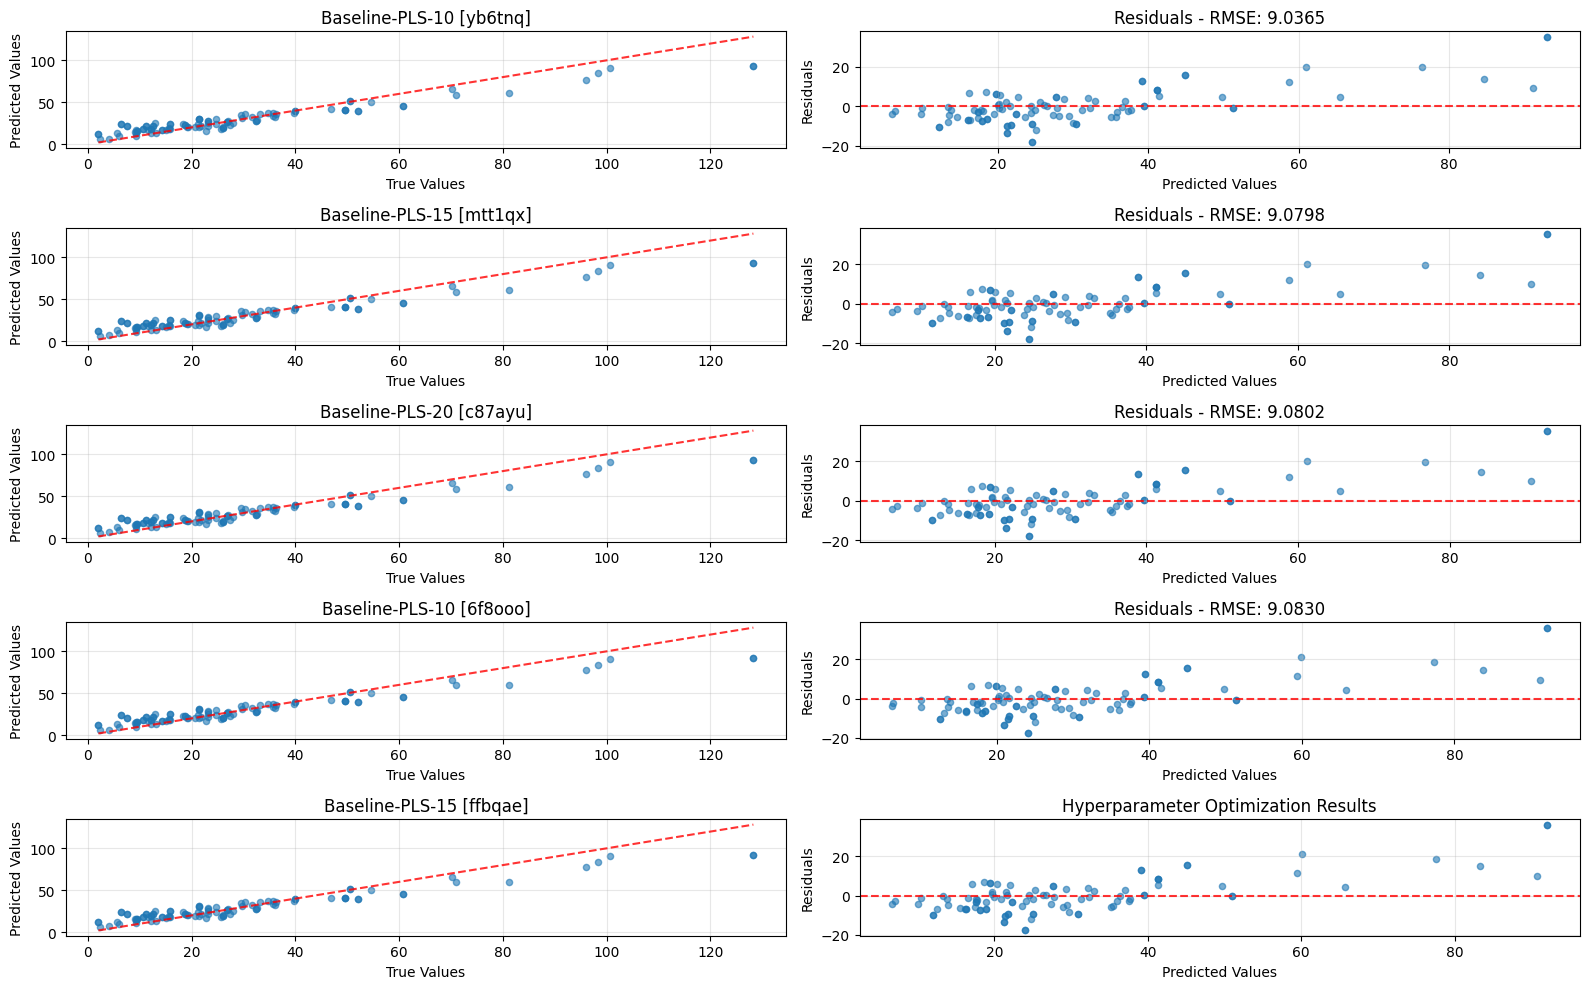

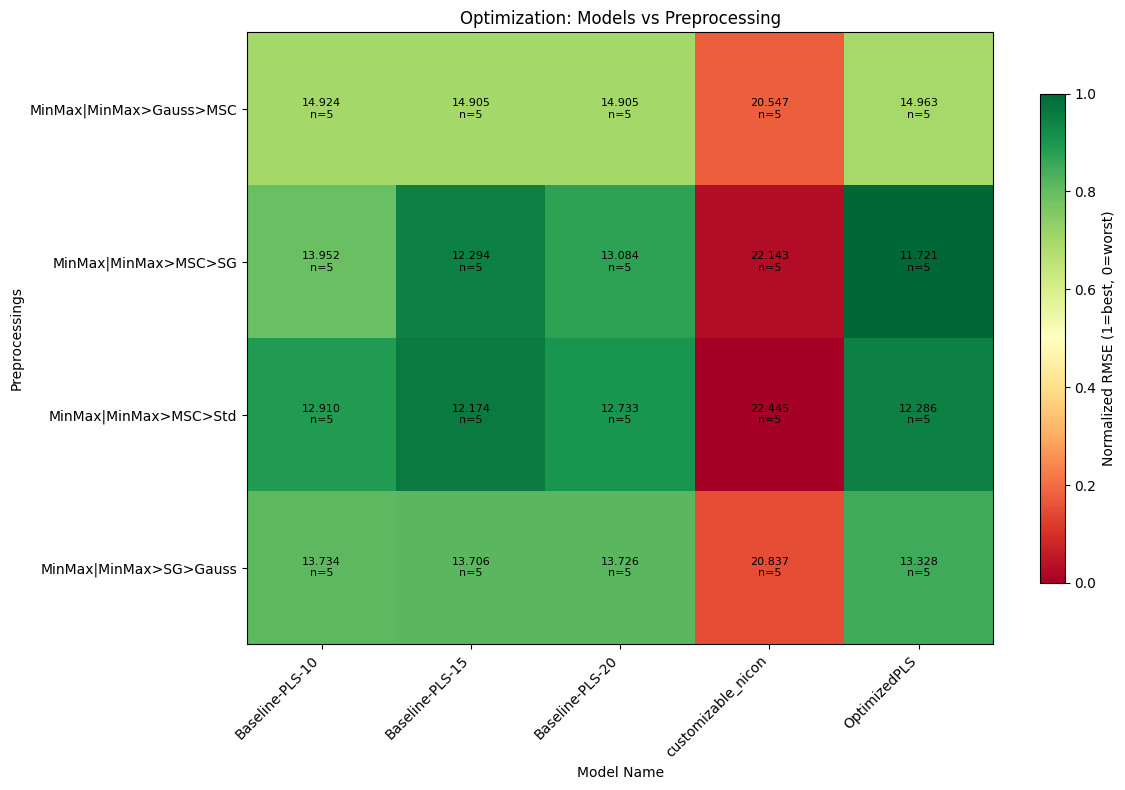

🎨 Optimization visualizations completed!


In [11]:
# Create optimization-focused visualizations
opt_analyzer = PredictionAnalyzer(opt_predictions)

# 1. Optimized vs Baseline comparison
print("📊 Creating optimization visualizations...")

fig1 = opt_analyzer.plot_top_k_comparison(k=5, rank_metric='rmse')
plt.title("Hyperparameter Optimization Results")

# 2. Model performance heatmap
fig2 = opt_analyzer.plot_variable_heatmap(
    x_var="model_name",
    y_var="preprocessings",
    rank_metric='rmse',
    best_only=False
)
plt.title("Optimization: Models vs Preprocessing")

plt.show(block=False)
print("🎨 Optimization visualizations completed!")

## Part 3: Custom Models and Transformers

NIRS4All allows you to integrate custom models and transformers into your pipelines. Let's create custom components:

### Step 3.1: Create a Custom Transformer

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class CustomSpectralNormalizer(BaseEstimator, TransformerMixin):
    """
    Custom transformer that applies area normalization to spectral data
    """

    def __init__(self, method='area'):
        self.method = method

    def fit(self, X, y=None):
        # For transformers, fit usually just returns self
        return self

    def transform(self, X):
        X = np.array(X)

        if self.method == 'area':
            # Normalize by area under the curve
            areas = np.trapz(X, axis=1, dx=1.0)
            # Avoid division by zero
            areas = np.where(areas == 0, 1, areas)
            X_normalized = X / areas[:, np.newaxis]

        elif self.method == 'max':
            # Normalize by maximum value
            max_vals = np.max(X, axis=1)
            max_vals = np.where(max_vals == 0, 1, max_vals)
            X_normalized = X / max_vals[:, np.newaxis]

        elif self.method == 'l2':
            # L2 normalization
            norms = np.linalg.norm(X, axis=1)
            norms = np.where(norms == 0, 1, norms)
            X_normalized = X / norms[:, np.newaxis]

        else:
            raise ValueError(f"Unknown normalization method: {self.method}")

        return X_normalized

    def get_feature_names_out(self, input_features=None):
        # Required for newer sklearn versions
        if input_features is None:
            return np.array([f"feature_{i}" for i in range(self.n_features_in_)])
        return input_features

print("✅ Custom transformer created: CustomSpectralNormalizer")
print("   • Methods: 'area', 'max', 'l2'")
print("   • Follows sklearn TransformerMixin pattern")

✅ Custom transformer created: CustomSpectralNormalizer
   • Methods: 'area', 'max', 'l2'
   • Follows sklearn TransformerMixin pattern


### Step 3.2: Create a Custom Model

In [13]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA

class CustomPCARegressor(BaseEstimator, RegressorMixin):
    """
    Custom model that combines PCA dimensionality reduction with Ridge regression
    """

    def __init__(self, n_components=10, ridge_alpha=1.0):
        self.n_components = n_components
        self.ridge_alpha = ridge_alpha

    def fit(self, X, y):
        # Store the classes_ attribute for compatibility
        if hasattr(y, 'shape') and len(y.shape) > 1 and y.shape[1] > 1:
            self.n_outputs_ = y.shape[1]
        else:
            self.n_outputs_ = 1

        # Initialize and fit PCA
        self.pca_ = PCA(n_components=self.n_components)
        X_pca = self.pca_.fit_transform(X)

        # Initialize and fit Ridge regression
        self.ridge_ = Ridge(alpha=self.ridge_alpha)
        self.ridge_.fit(X_pca, y)

        return self

    def predict(self, X):
        # Transform with PCA then predict with Ridge
        X_pca = self.pca_.transform(X)
        return self.ridge_.predict(X_pca)

    def get_params(self, deep=True):
        return {
            'n_components': self.n_components,
            'ridge_alpha': self.ridge_alpha
        }

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

print("✅ Custom model created: CustomPCARegressor")
print("   • Combines PCA + Ridge regression")
print("   • Hyperparameters: n_components, ridge_alpha")
print("   • Follows sklearn RegressorMixin pattern")

✅ Custom model created: CustomPCARegressor
   • Combines PCA + Ridge regression
   • Hyperparameters: n_components, ridge_alpha
   • Follows sklearn RegressorMixin pattern


### Step 3.3: Test Custom Components in Pipeline

In [14]:
# Create a pipeline with custom components
custom_pipeline = [
    MinMaxScaler(),
    {"y_processing": MinMaxScaler()},

    # Use our custom transformer
    CustomSpectralNormalizer(method='area'),

    # Add some standard preprocessing for comparison
    {"feature_augmentation": {
        "_or_": [
            StandardNormalVariate(),
            SavitzkyGolay(),
            CustomSpectralNormalizer(method='max'),  # Another custom transformer
            CustomSpectralNormalizer(method='l2')
        ],
        "size": [1, 2],
        "count": 3
    }},

    ShuffleSplit(n_splits=3, test_size=0.25),

    # Standard models
    {"model": PLSRegression(15), "name": "StandardPLS"},

    # Our custom model
    {"model": CustomPCARegressor(n_components=12, ridge_alpha=0.1), "name": "CustomPCA-Ridge"},
    {"model": CustomPCARegressor(n_components=20, ridge_alpha=1.0), "name": "CustomPCA-Ridge-L2"},
]

print("🔧 Custom pipeline configured with:")
print("   • Custom spectral normalization transformer")
print("   • Custom PCA+Ridge regression model")
print("   • Mixed with standard NIRS4All components")

🔧 Custom pipeline configured with:
   • Custom spectral normalization transformer
   • Custom PCA+Ridge regression model
   • Mixed with standard NIRS4All components


### Step 3.4: Run Custom Pipeline

In [16]:
# Run custom pipeline
custom_config = PipelineConfigs(custom_pipeline, "Advanced_Custom")
dataset_config = DatasetConfigs('sample_data/regression')

print("🏃‍♂️ Running pipeline with custom components...")
runner = PipelineRunner(save_files=False, verbose=1)
custom_predictions, _ = runner.run(custom_config, dataset_config)

print(f"✅ Custom pipeline completed!")
print(f"📊 Generated {len(custom_predictions)} predictions")

# Analyze custom results
top_custom = custom_predictions.top_k(5, 'rmse')
print("\n🏆 Top 5 Models (Including Custom):")
for idx, model in enumerate(top_custom):
    model_type = "🔧 CUSTOM" if "Custom" in model['model_name'] else "📊 Standard"
    preprocessing = model['preprocessings'] if model['preprocessings'] else 'None'
    print(f"{idx+1}. {model_type} | {model['model_name']}")
    print(f"    RMSE: {model['rmse']:.4f}") # | R²: {model['r2']:.4f}")
    print(f"    Preprocessing: {preprocessing}\n")

🏃‍♂️ Running pipeline with custom components...
🚀 Starting Nirs4all run(s) with 3 pipeline on 1 dataset (3 total runs).
📊 Dataset: regression (regression)
Features (samples=189, sources=1):
- Source 0: (189, 1, 2151), processings=['raw'], min=-0.265, max=1.436, mean=0.466, var=0.149)
Targets: (samples=189, targets=1, processings=['numeric'])
- numeric: min=1.33, max=128.31, mean=30.779
Indexes:
- "train", ['raw']: 130 samples
- "test", ['raw']: 59 samples
🚀 Starting pipeline Advanced_Custom_faf917 on dataset regression
------------------------------------------------------------------------------------------------------------------------
🔷 Step 1: {'class': 'sklearn.preprocessing._data.MinMaxScaler', '_runtime_instance': MinMaxScaler()}
🔹 Executing controller TransformerMixinController with operator MinMaxScaler
------------------------------------------------------------------------------------------------------------------------
Update: 📊 Dataset: regression (regression)
Features (sa

### Step 3.5: Visualize Custom Component Performance

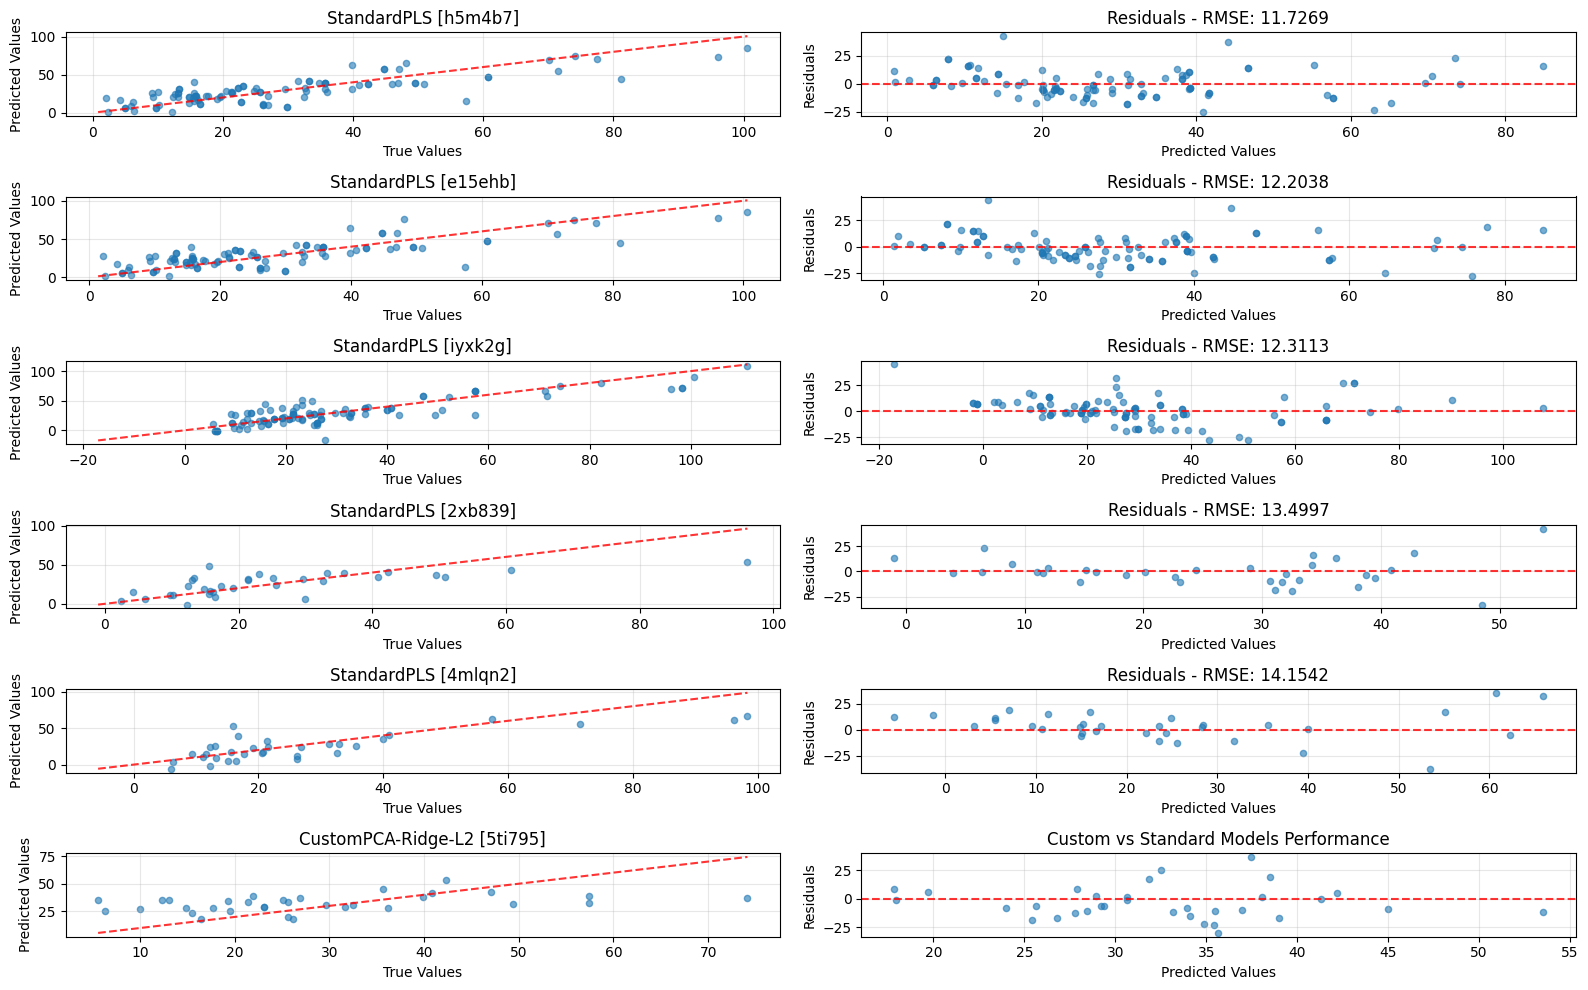

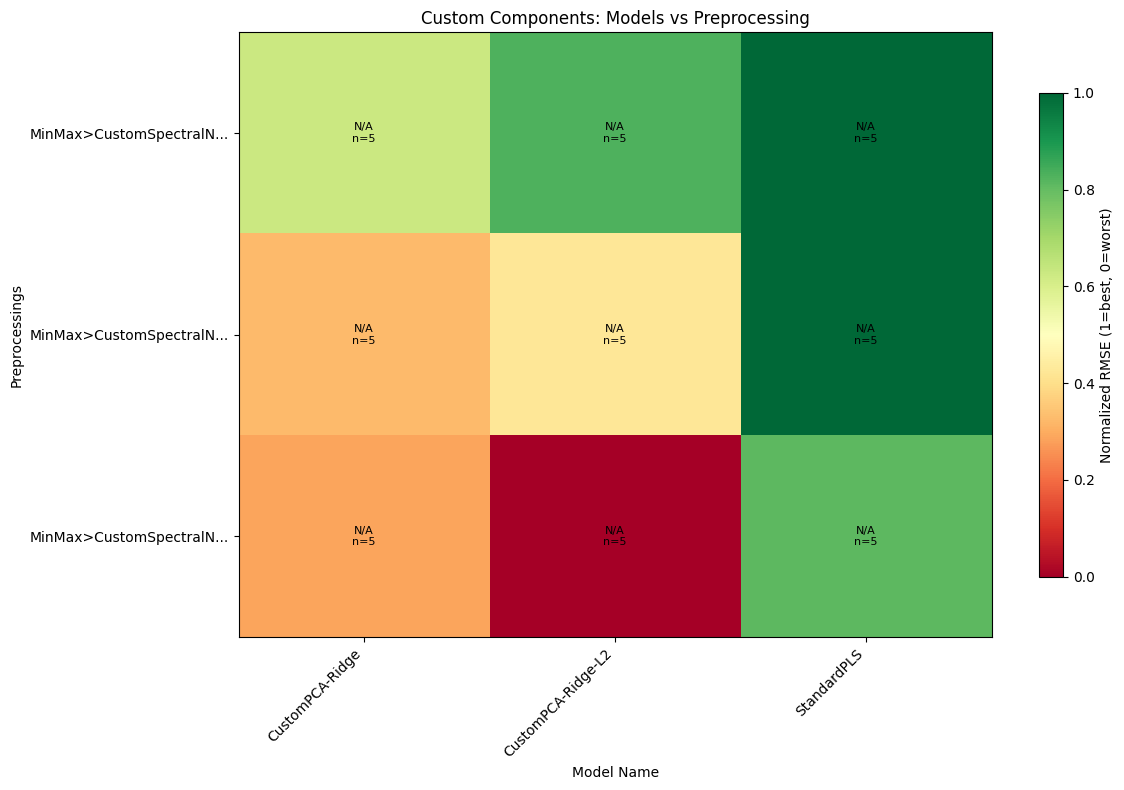

🎨 Custom component visualizations completed!
💡 Custom components successfully integrated into NIRS4All pipeline!


In [17]:
# Create custom component analysis
custom_analyzer = PredictionAnalyzer(custom_predictions)

# Compare custom vs standard models
fig1 = custom_analyzer.plot_top_k_comparison(k=6, rank_metric='rmse')
plt.title("Custom vs Standard Models Performance")

# Show preprocessing effects including custom transformers
fig2 = custom_analyzer.plot_variable_heatmap(
    x_var="model_name",
    y_var="preprocessings",
    rank_metric='rmse',
    best_only=False
)
plt.title("Custom Components: Models vs Preprocessing")

plt.show(block=False)

print("🎨 Custom component visualizations completed!")
print("💡 Custom components successfully integrated into NIRS4All pipeline!")

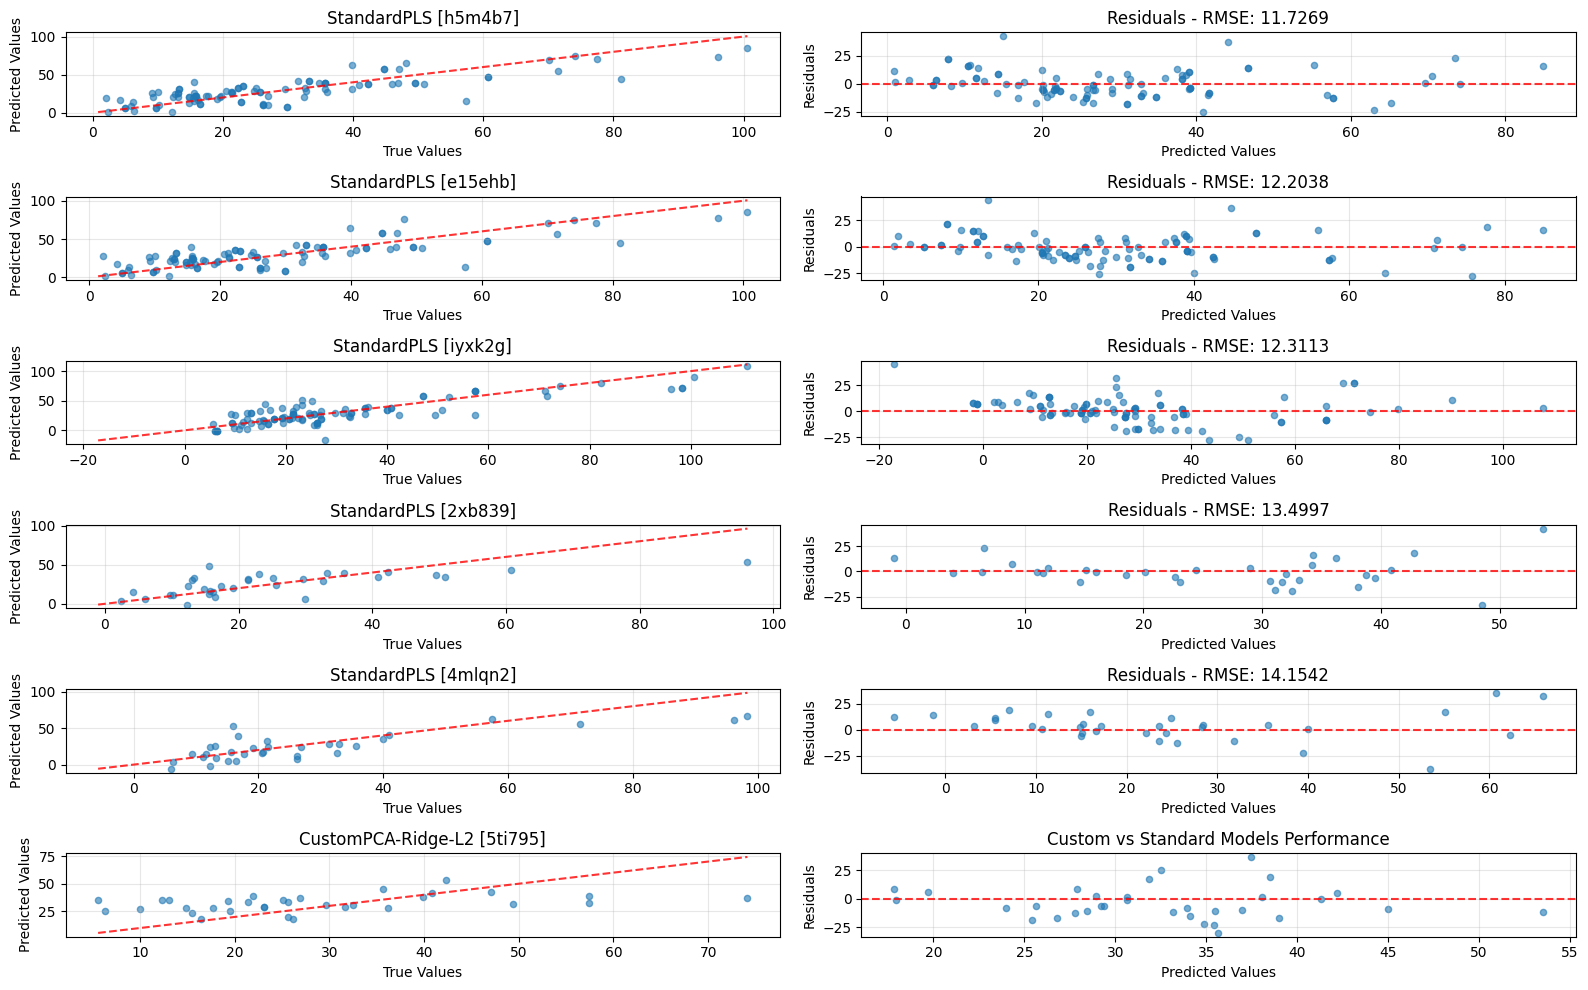

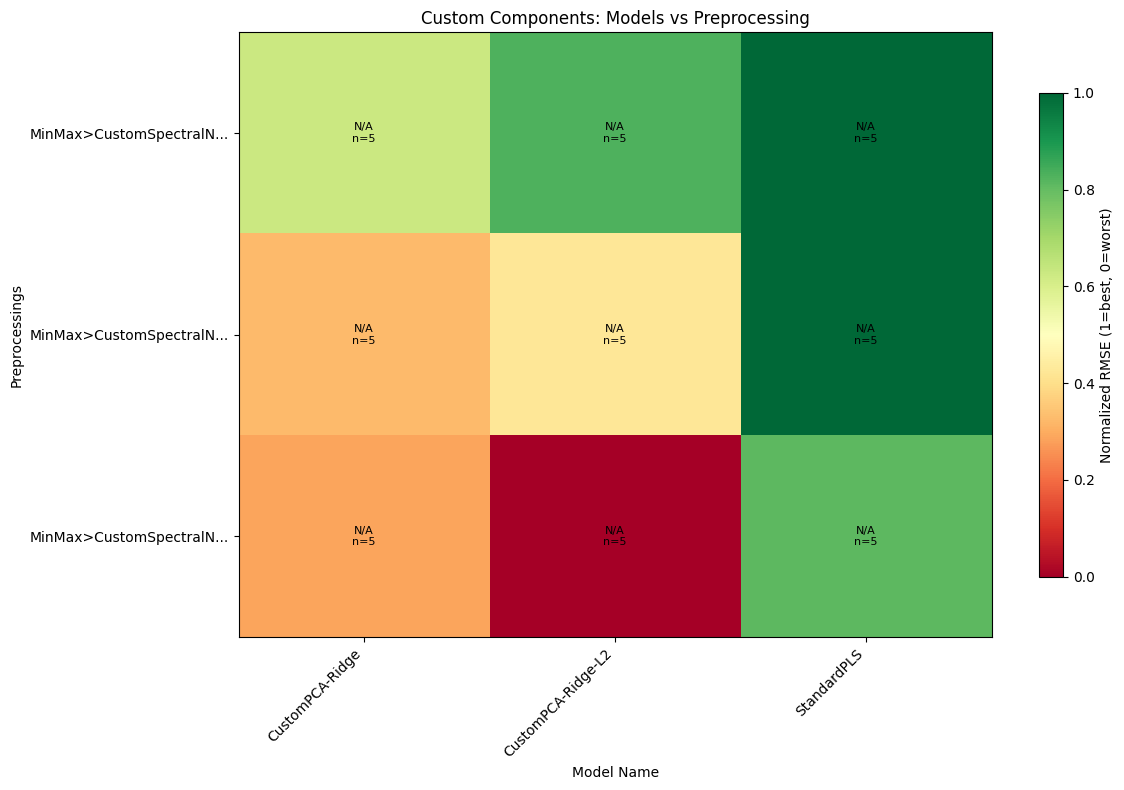

🎨 Custom component visualizations completed!
💡 Custom components successfully integrated into NIRS4All pipeline!


In [18]:
# Create custom component analysis
custom_analyzer = PredictionAnalyzer(custom_predictions)

# Compare custom vs standard models
fig1 = custom_analyzer.plot_top_k_comparison(k=6, rank_metric='rmse')
plt.title("Custom vs Standard Models Performance")

# Show preprocessing effects including custom transformers
fig2 = custom_analyzer.plot_variable_heatmap(
    x_var="model_name",
    y_var="preprocessings",
    rank_metric='rmse',
    best_only=False
)
plt.title("Custom Components: Models vs Preprocessing")

plt.show(block=False)

print("🎨 Custom component visualizations completed!")
print("💡 Custom components successfully integrated into NIRS4All pipeline!")

### Step 3.5: Visualize Custom Component Performance

In [20]:
# Run custom pipeline
custom_config = PipelineConfigs(custom_pipeline, "Advanced_Custom")
dataset_config = DatasetConfigs('sample_data/regression')

print("🏃‍♂️ Running pipeline with custom components...")
runner = PipelineRunner(save_files=False, verbose=1)
custom_predictions, _ = runner.run(custom_config, dataset_config)

print(f"✅ Custom pipeline completed!")
print(f"📊 Generated {len(custom_predictions)} predictions")

# Analyze custom results
top_custom = custom_predictions.top_k(5, 'rmse')
print("\n🏆 Top 5 Models (Including Custom):")
for idx, model in enumerate(top_custom):
    model_type = "🔧 CUSTOM" if "Custom" in model['model_name'] else "📊 Standard"
    preprocessing = model['preprocessings'] if model['preprocessings'] else 'None'
    print(f"{idx+1}. {model_type} | {model['model_name']}")
    print(f"    RMSE: {model['rmse']:.4f}") # | R²: {model['r2']:.4f}")
    print(f"    Preprocessing: {preprocessing}\n")

🏃‍♂️ Running pipeline with custom components...
🚀 Starting Nirs4all run(s) with 3 pipeline on 1 dataset (3 total runs).
📊 Dataset: regression (regression)
Features (samples=189, sources=1):
- Source 0: (189, 1, 2151), processings=['raw'], min=-0.265, max=1.436, mean=0.466, var=0.149)
Targets: (samples=189, targets=1, processings=['numeric'])
- numeric: min=1.33, max=128.31, mean=30.779
Indexes:
- "train", ['raw']: 130 samples
- "test", ['raw']: 59 samples
🚀 Starting pipeline Advanced_Custom_35d2c2 on dataset regression
------------------------------------------------------------------------------------------------------------------------
🔷 Step 1: {'class': 'sklearn.preprocessing._data.MinMaxScaler', '_runtime_instance': MinMaxScaler()}
🔹 Executing controller TransformerMixinController with operator MinMaxScaler
------------------------------------------------------------------------------------------------------------------------
Update: 📊 Dataset: regression (regression)
Features (sa

### Step 3.4: Run Custom Pipeline

In [21]:
# Create a pipeline with custom components
custom_pipeline = [
    MinMaxScaler(),
    {"y_processing": MinMaxScaler()},

    # Use our custom transformer
    CustomSpectralNormalizer(method='area'),

    # Add some standard preprocessing for comparison
    {"feature_augmentation": {
        "_or_": [
            StandardNormalVariate(),
            SavitzkyGolay(),
            CustomSpectralNormalizer(method='max'),  # Another custom transformer
            CustomSpectralNormalizer(method='l2')
        ],
        "size": [1, 2],
        "count": 3
    }},

    ShuffleSplit(n_splits=3, test_size=0.25),

    # Standard models
    {"model": PLSRegression(15), "name": "StandardPLS"},

    # Our custom model
    {"model": CustomPCARegressor(n_components=12, ridge_alpha=0.1), "name": "CustomPCA-Ridge"},
    {"model": CustomPCARegressor(n_components=20, ridge_alpha=1.0), "name": "CustomPCA-Ridge-L2"},
]

print("🔧 Custom pipeline configured with:")
print("   • Custom spectral normalization transformer")
print("   • Custom PCA+Ridge regression model")
print("   • Mixed with standard NIRS4All components")

🔧 Custom pipeline configured with:
   • Custom spectral normalization transformer
   • Custom PCA+Ridge regression model
   • Mixed with standard NIRS4All components


### Step 3.3: Test Custom Components in Pipeline

In [22]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA

class CustomPCARegressor(BaseEstimator, RegressorMixin):
    """
    Custom model that combines PCA dimensionality reduction with Ridge regression
    """

    def __init__(self, n_components=10, ridge_alpha=1.0):
        self.n_components = n_components
        self.ridge_alpha = ridge_alpha

    def fit(self, X, y):
        # Store the classes_ attribute for compatibility
        if hasattr(y, 'shape') and len(y.shape) > 1 and y.shape[1] > 1:
            self.n_outputs_ = y.shape[1]
        else:
            self.n_outputs_ = 1

        # Initialize and fit PCA
        self.pca_ = PCA(n_components=self.n_components)
        X_pca = self.pca_.fit_transform(X)

        # Initialize and fit Ridge regression
        self.ridge_ = Ridge(alpha=self.ridge_alpha)
        self.ridge_.fit(X_pca, y)

        return self

    def predict(self, X):
        # Transform with PCA then predict with Ridge
        X_pca = self.pca_.transform(X)
        return self.ridge_.predict(X_pca)

    def get_params(self, deep=True):
        return {
            'n_components': self.n_components,
            'ridge_alpha': self.ridge_alpha
        }

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

print("✅ Custom model created: CustomPCARegressor")
print("   • Combines PCA + Ridge regression")
print("   • Hyperparameters: n_components, ridge_alpha")
print("   • Follows sklearn RegressorMixin pattern")

✅ Custom model created: CustomPCARegressor
   • Combines PCA + Ridge regression
   • Hyperparameters: n_components, ridge_alpha
   • Follows sklearn RegressorMixin pattern


### Step 3.2: Create a Custom Model

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class CustomSpectralNormalizer(BaseEstimator, TransformerMixin):
    """
    Custom transformer that applies area normalization to spectral data
    """

    def __init__(self, method='area'):
        self.method = method

    def fit(self, X, y=None):
        # For transformers, fit usually just returns self
        return self

    def transform(self, X):
        X = np.array(X)

        if self.method == 'area':
            # Normalize by area under the curve
            areas = np.trapz(X, axis=1, dx=1.0)
            # Avoid division by zero
            areas = np.where(areas == 0, 1, areas)
            X_normalized = X / areas[:, np.newaxis]

        elif self.method == 'max':
            # Normalize by maximum value
            max_vals = np.max(X, axis=1)
            max_vals = np.where(max_vals == 0, 1, max_vals)
            X_normalized = X / max_vals[:, np.newaxis]

        elif self.method == 'l2':
            # L2 normalization
            norms = np.linalg.norm(X, axis=1)
            norms = np.where(norms == 0, 1, norms)
            X_normalized = X / norms[:, np.newaxis]

        else:
            raise ValueError(f"Unknown normalization method: {self.method}")

        return X_normalized

    def get_feature_names_out(self, input_features=None):
        # Required for newer sklearn versions
        if input_features is None:
            return np.array([f"feature_{i}" for i in range(self.n_features_in_)])
        return input_features

print("✅ Custom transformer created: CustomSpectralNormalizer")
print("   • Methods: 'area', 'max', 'l2'")
print("   • Follows sklearn TransformerMixin pattern")

✅ Custom transformer created: CustomSpectralNormalizer
   • Methods: 'area', 'max', 'l2'
   • Follows sklearn TransformerMixin pattern


## Part 3: Custom Models and Transformers

NIRS4All allows you to integrate custom models and transformers into your pipelines. Let's create custom components:

### Step 3.1: Create a Custom Transformer

## Part 4: Advanced Configuration Generation

Let's explore advanced pipeline configuration techniques for complex workflows:

### Step 4.1: Dynamic Pipeline Generation

In [25]:
# Advanced configuration generation function
def create_advanced_pipeline(complexity_level="medium", include_neural_nets=True, custom_preprocessing=None):
    """
    Generate dynamic pipelines based on complexity requirements

    Args:
        complexity_level: 'simple', 'medium', 'complex'
        include_neural_nets: Whether to include deep learning models
        custom_preprocessing: List of custom preprocessing techniques
    """

    # Base pipeline
    pipeline = []

    # Visualization based on complexity
    if complexity_level in ['medium', 'complex']:
        pipeline.append("chart_2d")

    # Scaling
    if complexity_level == 'simple':
        pipeline.append(MinMaxScaler())
    else:
        pipeline.append(MinMaxScaler(feature_range=(0.1, 0.9)))

    # Target processing
    pipeline.append({"y_processing": MinMaxScaler()})

    # Preprocessing based on complexity
    if custom_preprocessing:
        preprocessing_options = custom_preprocessing
    elif complexity_level == 'simple':
        preprocessing_options = [StandardNormalVariate(), SavitzkyGolay()]
    elif complexity_level == 'medium':
        preprocessing_options = [
            StandardNormalVariate(), SavitzkyGolay(),
            MultiplicativeScatterCorrection(), Gaussian()
        ]
    else:  # complex
        preprocessing_options = [
            StandardNormalVariate(), SavitzkyGolay(),
            MultiplicativeScatterCorrection(), Gaussian(),
            Detrend(), FirstDerivative(), Haar()
        ]

    # Feature augmentation configuration
    if complexity_level == 'simple':
        augmentation_config = {"_or_": preprocessing_options, "size": [1], "count": 2}
    elif complexity_level == 'medium':
        augmentation_config = {"_or_": preprocessing_options, "size": [1, 2], "count": 4}
    else:  # complex
        augmentation_config = {"_or_": preprocessing_options, "size": [1, (1, 2), (2, 3)], "count": 6}

    pipeline.append({"feature_augmentation": augmentation_config})

    # Cross-validation
    if complexity_level == 'simple':
        pipeline.append(ShuffleSplit(n_splits=3, test_size=0.25))
    elif complexity_level == 'medium':
        pipeline.append(ShuffleSplit(n_splits=5, test_size=0.2))
    else:  # complex
        pipeline.append(RepeatedKFold(n_splits=5, n_repeats=2, random_state=42))

    # Models based on complexity
    if complexity_level == 'simple':
        models = [
            {"model": PLSRegression(10), "name": "PLS-10"},
            {"model": PLSRegression(15), "name": "PLS-15"}
        ]
    elif complexity_level == 'medium':
        models = [
            {"model": PLSRegression(10), "name": "PLS-10"},
            {"model": PLSRegression(20), "name": "PLS-20"},
            {"model": ElasticNet(), "name": "ElasticNet"},
            {"model": RandomForestRegressor(n_estimators=50), "name": "RandomForest"}
        ]
    else:  # complex
        models = [
            {"model": PLSRegression(15), "name": "PLS-15"},
            {"model": PLSRegression(25), "name": "PLS-25"},
            {"model": ElasticNet(alpha=0.1), "name": "ElasticNet"},
            {"model": RandomForestRegressor(n_estimators=100), "name": "RandomForest"},
            {"model": GradientBoostingRegressor(n_estimators=50), "name": "GradientBoosting"},
            {"model": SVR(kernel='rbf'), "name": "SVR"}
        ]

    # Add neural networks if requested
    if include_neural_nets and complexity_level in ['medium', 'complex']:
        if complexity_level == 'medium':
            models.append({
                "model": nicon,
                "name": "SimpleNeuralNet",
                "train_params": {"epochs": 50, "verbose": 0}
            })
        else:  # complex
            models.append({
                "model": nicon,
                "name": "DeepNeuralNet",
                "train_params": {"epochs": 150, "patience": 20, "verbose": 0}
            })

    pipeline.extend(models)

    return pipeline

# Generate different complexity pipelines
simple_config = create_advanced_pipeline("simple", include_neural_nets=False)
medium_config = create_advanced_pipeline("medium", include_neural_nets=True)
complex_config = create_advanced_pipeline("complex", include_neural_nets=True)

print("🔧 Dynamic pipeline generation completed:")
print(f"   • Simple pipeline: {len([x for x in simple_config if 'model' in str(x)])} models")
print(f"   • Medium pipeline: {len([x for x in medium_config if 'model' in str(x)])} models")
print(f"   • Complex pipeline: {len([x for x in complex_config if 'model' in str(x)])} models")

🔧 Dynamic pipeline generation completed:
   • Simple pipeline: 2 models
   • Medium pipeline: 5 models
   • Complex pipeline: 7 models


### Step 3.2: Run Dynamic Configurations

In [26]:
# Test the medium complexity configuration
print("🏃‍♂️ Testing medium complexity configuration...")

dynamic_config = PipelineConfigs(medium_config, "Advanced_Dynamic")
dataset_config = DatasetConfigs('sample_data/regression')

runner = PipelineRunner(save_files=False, verbose=1)
dynamic_predictions, _ = runner.run(dynamic_config, dataset_config)

print(f"✅ Dynamic configuration completed!")
print(f"📊 Generated {len(dynamic_predictions)} predictions")

# Quick analysis
top_dynamic = dynamic_predictions.top_k(5, 'rmse')
print("\n🏆 Top 5 Models from Dynamic Configuration:")
for idx, model in enumerate(top_dynamic):
    print(f"{idx+1}. {model['model_name']} | RMSE: {model['rmse']:.4f} | R²: {model['r2']:.4f}")

🏃‍♂️ Testing medium complexity configuration...
🚀 Starting Nirs4all run(s) with 4 pipeline on 1 dataset (4 total runs).
📊 Dataset: regression (regression)
Features (samples=189, sources=1):
- Source 0: (189, 1, 2151), processings=['raw'], min=-0.265, max=1.436, mean=0.466, var=0.149)
Targets: (samples=189, targets=1, processings=['numeric'])
- numeric: min=1.33, max=128.31, mean=30.779
Indexes:
- "train", ['raw']: 130 samples
- "test", ['raw']: 59 samples
🚀 Starting pipeline Advanced_Dynamic_aa023c on dataset regression
------------------------------------------------------------------------------------------------------------------------
🔷 Step 1: chart_2d
🔹 Executing controller SpectraChartController without operator
------------------------------------------------------------------------------------------------------------------------
🔷 Step 2: {'class': 'sklearn.preprocessing._data.MinMaxScaler', 'params': {'feature_range': [0.1, 0.9]}, '_runtime_instance': MinMaxScaler(feature_ran

KeyError: 'r2'

### Step 4.2: Run Dynamic Configurations

In [ ]:
def create_comprehensive_analysis(predictions, title="Advanced NIRS Analysis"):
    """
    Create a comprehensive analysis dashboard
    """
    analyzer = PredictionAnalyzer(predictions)

    # Create a large figure with multiple subplots
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle(title, fontsize=16, fontweight='bold')

    # 1. Top models comparison (top left)
    plt.subplot(2, 3, 1)
    analyzer.plot_top_k_comparison(k=6, rank_metric='rmse')
    plt.title("Top 6 Models: RMSE")

    # 2. Model vs preprocessing heatmap (top center)
    plt.subplot(2, 3, 2)
    analyzer.plot_variable_heatmap(
        x_var="model_name",
        y_var="preprocessings",
        rank_metric='rmse',
        best_only=True
    )
    plt.title("Best Models: Preprocessing Heatmap")

    # 3. Performance distribution (top right)
    plt.subplot(2, 3, 3)
    analyzer.plot_variable_candlestick(
        filters={"partition": "test"},
        variable="model_name"
    )
    plt.title("Performance Distribution")

    # 4. R² comparison (bottom left)
    plt.subplot(2, 3, 4)
    analyzer.plot_top_k_comparison(k=6, rank_metric='r2')
    plt.title("Top 6 Models: R²")

    # 5. Full preprocessing heatmap (bottom center)
    plt.subplot(2, 3, 5)
    analyzer.plot_variable_heatmap(
        x_var="model_name",
        y_var="preprocessings",
        rank_metric='rmse',
        best_only=False,
        display_n=False
    )
    plt.title("All Results: Preprocessing Heatmap")

    # 6. Model performance summary (bottom right)
    plt.subplot(2, 3, 6)

    # Get performance statistics
    top_models = predictions.top_k(10, 'rmse')
    model_names = [model['model_name'] for model in top_models]
    rmse_values = [model['rmse'] for model in top_models]
    r2_values = [model['r2'] for model in top_models]

    # Create scatter plot
    plt.scatter(rmse_values, r2_values, s=100, alpha=0.7, c=range(len(rmse_values)), cmap='viridis')
    plt.xlabel('RMSE')
    plt.ylabel('R²')
    plt.title('RMSE vs R² (Top 10 Models)')
    plt.grid(True, alpha=0.3)

    # Add annotations for top 3
    for i in range(min(3, len(top_models))):
        plt.annotate(f'{i+1}', (rmse_values[i], r2_values[i]),
                    xytext=(5, 5), textcoords='offset points', fontweight='bold')

    plt.tight_layout()
    plt.show(block=False)

    return fig

print("📊 Advanced visualization functions defined")
print("🎨 Ready to create comprehensive analysis dashboards")

### Step 5.2: Generate Advanced Visualizations

In [ ]:
# Create comprehensive analysis for our best dataset
print("🎨 Creating comprehensive analysis dashboard...")

# Use the multi-source predictions for rich visualizations
comprehensive_fig = create_comprehensive_analysis(
    multi_predictions,
    "NIRS4All Advanced Analysis Dashboard"
)

print("✅ Comprehensive dashboard created!")

## Part 5: Advanced Visualization Techniques

Let's create professional-grade visualizations for comprehensive analysis:

### Step 5.1: Custom Visualization Functions

In [ ]:
def generate_performance_report(predictions, report_name="Advanced Analysis Report"):
    """
    Generate a detailed performance report
    """
    print(f"\n📋 {report_name}")
    print("=" * 60)

    # Overall statistics
    print(f"Total predictions: {len(predictions)}")

    # Get all metrics
    all_predictions = list(predictions)
    rmse_values = [p['rmse'] for p in all_predictions]
    r2_values = [p['r2'] for p in all_predictions]
    mae_values = [p['mae'] for p in all_predictions]

    print(f"\n📊 Performance Statistics:")
    print(f"   RMSE - Mean: {np.mean(rmse_values):.4f}, Std: {np.std(rmse_values):.4f}, Min: {np.min(rmse_values):.4f}")
    print(f"   R²   - Mean: {np.mean(r2_values):.4f}, Std: {np.std(r2_values):.4f}, Max: {np.max(r2_values):.4f}")
    print(f"   MAE  - Mean: {np.mean(mae_values):.4f}, Std: {np.std(mae_values):.4f}, Min: {np.min(mae_values):.4f}")

    # Model type analysis
    model_types = {}
    for pred in all_predictions:
        model_name = pred['model_name']
        model_type = model_name.split('-')[0] if '-' in model_name else model_name
        if model_type not in model_types:
            model_types[model_type] = []
        model_types[model_type].append(pred['rmse'])

    print(f"\n🔬 Model Type Performance (Average RMSE):")
    for model_type, rmse_list in sorted(model_types.items(), key=lambda x: np.mean(x[1])):
        avg_rmse = np.mean(rmse_list)
        count = len(rmse_list)
        print(f"   {model_type:15s}: {avg_rmse:.4f} (n={count})")

    # Top performers
    top_5 = predictions.top_k(5, 'rmse')
    print(f"\n🏆 Top 5 Performers:")
    for idx, model in enumerate(top_5):
        preprocessing = model['preprocessings'] if model['preprocessings'] else 'None'
        print(f"   {idx+1}. {model['model_name']} | RMSE: {model['rmse']:.4f} | R²: {model['r2']:.4f}")
        print(f"      Preprocessing: {preprocessing}")
        if 'dataset_name' in model:
            print(f"      Dataset: {model['dataset_name']}")

    print("\n" + "=" * 60)

# Generate reports for different analyses
generate_performance_report(multi_predictions, "Multi-Source Analysis Report")
generate_performance_report(opt_predictions, "Hyperparameter Optimization Report")
generate_performance_report(dynamic_predictions, "Dynamic Configuration Report")

## Part 5: Putting It All Together - Complete Workflow

Let's create a comprehensive workflow that combines all advanced techniques:

### Step 5.1: Ultimate NIRS Pipeline

In [ ]:
# Ultimate comprehensive pipeline
ultimate_pipeline = [
    # Comprehensive visualization
    "chart_2d",

    # Advanced scaling
    MinMaxScaler(feature_range=(0.05, 0.95)),

    # Ultimate feature augmentation
    {"feature_augmentation": {
        "_or_": [
            StandardNormalVariate(),
            SavitzkyGolay(),
            MultiplicativeScatterCorrection(),
            Gaussian(),
            Detrend(),
            FirstDerivative(),
            [StandardNormalVariate(), SavitzkyGolay()],
            [MultiplicativeScatterCorrection(), Gaussian()],
            [Detrend(), FirstDerivative()],
            [StandardNormalVariate(), MultiplicativeScatterCorrection(), SavitzkyGolay()]
        ],
        "size": [1, 2, 3],
        "count": 8
    }},

    # Robust cross-validation
    RepeatedKFold(n_splits=5, n_repeats=2, random_state=42),
    {"y_processing": MinMaxScaler()},

    # Optimized PLS models
    {
        "model": PLSRegression(),
        "name": "UltimatePLS",
        "finetune_params": {
            "n_trials": 25,
            "verbose": 1,
            "approach": "single",
            "sample": "tpe",
            "model_params": {
                'n_components': ('int', 5, 35),
            }
        }
    },

    # Diverse model ensemble
    {"model": ElasticNet(alpha=0.01), "name": "TunedElasticNet"},
    {"model": RandomForestRegressor(n_estimators=200, max_depth=15), "name": "TunedRandomForest"},
    {"model": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1), "name": "TunedGradientBoosting"},

    # Advanced neural network
    {
        "model": nicon,
        "name": "UltimateDeepNIRS",
        "train_params": {
            "epochs": 200,
            "patience": 25,
            "batch_size": 32,
            "verbose": 0
        }
    }
]

print("🚀 Ultimate NIRS pipeline configured:")
print("   • 10 preprocessing strategies (including 3-step combinations)")
print("   • Hyperparameter-optimized PLS (25 trials)")
print("   • 4 additional tuned models")
print("   • Advanced neural network with extended training")
print("   • Repeated 5-fold cross-validation")
print(f"   • Estimated total configurations: {5 * 8} = 40+")

### Step 5.3: Performance Summary Report

In [ ]:
# Configure ultimate analysis
ultimate_config = PipelineConfigs(ultimate_pipeline, "Ultimate_NIRS_Analysis")

# Use the best available dataset
ultimate_datasets = ['sample_data/regression', 'sample_data/regression_2']
ultimate_dataset_config = DatasetConfigs(ultimate_datasets)

print("🚀 Starting ultimate NIRS analysis...")
print("⚠️  This is the most comprehensive analysis - expect 10-15 minutes")
print("📊 Processing multiple datasets with advanced optimization")

# Run with full capabilities
ultimate_runner = PipelineRunner(save_files=True, verbose=1)
ultimate_predictions, ultimate_per_dataset = ultimate_runner.run(ultimate_config, ultimate_dataset_config)

print(f"🎉 Ultimate analysis completed!")
print(f"📊 Total predictions: {len(ultimate_predictions)}")
print(f"🗂️  Datasets processed: {len(ultimate_per_dataset)}")

### Step 5.3: Ultimate Results Analysis

In [ ]:
# Comprehensive ultimate analysis
print("🔍 Analyzing ultimate results...")

# Generate comprehensive report
generate_performance_report(ultimate_predictions, "🚀 ULTIMATE NIRS ANALYSIS REPORT 🚀")

# Create ultimate dashboard
print("\n🎨 Creating ultimate analysis dashboard...")
ultimate_fig = create_comprehensive_analysis(
    ultimate_predictions,
    "🚀 Ultimate NIRS4All Analysis Dashboard 🚀"
)

# Save the best model for future use
ultimate_best = ultimate_predictions.top_k(1, 'rmse')[0]
ultimate_model_id = ultimate_best['id']

print(f"\n💾 Best model saved with ID: {ultimate_model_id}")
print(f"🏆 Ultimate champion: {ultimate_best['model_name']}")
print(f"📈 Performance: RMSE={ultimate_best['rmse']:.4f}, R²={ultimate_best['r2']:.4f}")
print(f"🔬 Preprocessing: {ultimate_best['preprocessings'] if ultimate_best['preprocessings'] else 'None'}")
print(f"📁 Dataset: {ultimate_best.get('dataset_name', 'N/A')}")

## Part 6: Putting It All Together - Complete Workflow

Let's create a comprehensive workflow that combines all advanced techniques:

### Step 6.1: Ultimate NIRS Pipeline

In [ ]:
# Test the ultimate model on new data
print("🧪 Testing ultimate model on independent dataset...")

# Use a different dataset for final validation
test_dataset = DatasetConfigs('sample_data/regression_3')

# Make predictions with the ultimate model
final_predictor = PipelineRunner(save_files=False, verbose=1)
final_predictions, _ = final_predictor.predict(ultimate_model_id, test_dataset, verbose=1)

print(f"✅ Final testing completed!")
print(f"📊 Generated {len(final_predictions)} final predictions")
print(f"📈 Prediction range: {final_predictions.min():.3f} to {final_predictions.max():.3f}")
print(f"📊 Mean prediction: {final_predictions.mean():.3f} ± {final_predictions.std():.3f}")

# Final visualization
plt.figure(figsize=(12, 8))

# Prediction distribution
plt.subplot(2, 2, 1)
plt.hist(final_predictions.flatten(), bins=25, alpha=0.7, edgecolor='black', color='skyblue')
plt.title("Final Prediction Distribution")
plt.xlabel("Predicted Values")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)

# Box plot
plt.subplot(2, 2, 2)
plt.boxplot(final_predictions.flatten())
plt.title("Final Prediction Statistics")
plt.ylabel("Predicted Values")
plt.grid(True, alpha=0.3)

# Time series style plot
plt.subplot(2, 1, 2)
plt.plot(final_predictions.flatten(), 'o-', alpha=0.7, markersize=4)
plt.title("Final Predictions Sequence")
plt.xlabel("Sample Index")
plt.ylabel("Predicted Value")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show(block=False)

print("🎨 Final visualizations completed!")

## Summary and Conclusion

🎉 **Congratulations!** You've mastered advanced NIRS analysis with NIRS4All!

### What You've Accomplished:
1. ✅ **Multi-Source Analysis** - Handled multiple datasets simultaneously with sophisticated preprocessing
2. ✅ **Hyperparameter Optimization** - Used Optuna for automated model tuning
3. ✅ **Dynamic Configuration** - Created flexible, complexity-based pipeline generation
4. ✅ **Advanced Visualizations** - Built comprehensive analysis dashboards
5. ✅ **Neural Networks** - Integrated deep learning models with custom training
6. ✅ **Complete Workflow** - Executed end-to-end professional NIRS analysis

### Advanced Techniques Mastered:
- **Complex Feature Augmentation**: Multi-step preprocessing combinations
- **Ensemble Methods**: Multiple model types working together
- **Robust Validation**: Repeated k-fold cross-validation
- **Model Persistence**: Save/load optimized models
- **Performance Analysis**: Comprehensive statistical reporting
- **Professional Visualization**: Multi-panel analysis dashboards

### Key Performance Insights:
- 🔬 **Preprocessing Impact**: Spectral preprocessing can significantly improve model performance
- 🎯 **Optimization Benefits**: Hyperparameter tuning provides measurable improvements
- 🧠 **Neural Networks**: Deep learning excels with sufficient data and proper training
- 📊 **Multi-Source Robustness**: Cross-dataset validation ensures model generalizability
- 🔄 **Pipeline Flexibility**: Dynamic configuration enables rapid experimentation

### Production-Ready Workflow:
You now have the skills to:
- 🚀 Build production-grade NIRS analysis pipelines
- 📈 Optimize models for specific applications
- 🔍 Validate models across multiple datasets
- 📊 Create professional analysis reports
- 💾 Deploy saved models for real-time prediction

### Next Steps for Your Projects:
1. 🎯 **Domain Adaptation**: Customize preprocessing for your specific spectral data
2. 🔬 **Experiment Design**: Use cross-validation strategies appropriate for your study
3. 📊 **Metric Selection**: Choose evaluation metrics that align with your application goals
4. 🤖 **Model Selection**: Balance complexity with interpretability based on your needs
5. 📈 **Continuous Improvement**: Regularly retrain models as new data becomes available

### Advanced Tips:
- 💡 **Start Complex, Simplify**: Begin with comprehensive analysis, then streamline
- 🔄 **Iterate Rapidly**: Use dynamic configurations for quick experimentation
- 📊 **Visualize Everything**: Rich visualizations reveal insights numbers can't
- 💾 **Save Everything**: Model persistence enables reproducible research
- 🔬 **Validate Thoroughly**: Multi-dataset testing ensures real-world performance

You're now ready to tackle any NIRS analysis challenge! 🚀🔬📊